In [831]:
import pandas as pd

# cm_features = pd.read_csv('data/cm_features_with_name.csv')
cm_features = pd.read_csv('data/cm_features_v0.4.csv')
cm_features

month_id  country_id  gleditsch_ward  ged_sb  ged_ns  ged_os  acled_sb  \
0           121           1             110       0       0       0         0   
1           121           2             115       0       0       0         0   
2           121           3              52       0       0       0         0   
3           121           4             101       0       0      12         0   
4           121           7             160       0       0       0         0   
...         ...         ...             ...     ...     ...     ...       ...   
63203       502         242             510       0       0       1         0   
63204       502         243             600       0       0       0         2   
63205       502         244             435       0       0       0         0   
63206       502         245             625       3       3       9         2   
63207       502         246             626       2      62       0         0   

       acled_sb_count  acled_os  ged_sb_tsum_24  ...  \
0                   0         0               0  ...   
1                   0         0               0  ...   
2                   0         0               0  ...   
3                   0         0               0  ...   
4                   0         0               0  ...   
...               ...       ...             ...  ...   
63203               0         2              30  ...   
63204               2         0               5  ...   
63205               0         0               0  ...   
63206               1        42              82  ...   
63207               9        26             191  ...   

       renewable_internal_pcap_t48  renewable_pcap_t48  \
0                    315260.986388       354505.092577   
1                    264606.831667       264606.831667   
2                      3244.939711         3244.939711   
3                     45295.968642        74555.476336   
4                      9511.721633        28542.982753   
...                            ...                 ...   
63203                  1536.763246         1761.240449   
63204                   815.035895          815.035895   
63205                    93.401859         2661.952986   
63206                    98.007034          926.166474   
63207                  2382.968084         4536.804621   

       splag_1_decay_ged_sb_5  splag_1_decay_ged_os_5  splag_1_decay_ged_ns_5  \
0                    0.093750                1.034032                0.093750   
1                    0.062500                0.062500                0.062500   
2                    0.000000                0.000000                0.000000   
3                    1.062500                1.062500                0.093750   
4                    0.874154                0.156250                0.156250   
...                       ...                     ...                     ...   
63203                4.412313                3.889290                2.105145   
63204                0.823197                0.049630                0.060734   
63205                1.844790                1.055986                1.065787   
63206                5.816131                4.897757                4.263890   
63207                4.950636                4.593437                4.628575   

                   country        date  year  ccode         gw_statename  
0                   Guyana  1990-01-01  1990    110               Guyana  
1                 Suriname  1990-01-01  1990    115              Surinam  
2      Trinidad and Tobago  1990-01-01  1990     52  Trinidad and Tobago  
3                Venezuela  1990-01-01  1990    101            Venezuela  
4                Argentina  1990-01-01  1990    160            Argentina  
...                    ...         ...   ...    ...                  ...  
63203             Tanzania  2021-10-01  2021    510  Tanzania/Tanganyika  
63204              Morocco  2021-10-01  2021    600              Morocco  
63205           

In [832]:
from utilities import views_month_id_to_date

# load benchmark model
prediction_year = 2018
model_names = {
    "bootstrap": "bm_cm_bootstrap_expanded_",
    "poisson": "bm_cm_last_historical_poisson_expanded_",
}
benchmark_model = pd.read_parquet(f'Benchmarks/{model_names["bootstrap"]}{prediction_year}.parquet')
# Group by 'month_id' and 'country_id' and calculate mean and std for each group
agg_funcs = {
    'outcome': ['mean', 'std']  # Assuming 'prediction' is the column to aggregate; adjust if necessary
}
# there is 20 draws per each country per each month. Get the mean of the draws and std for each month
benchmark_model = benchmark_model.groupby(['month_id', 'country_id']).agg(agg_funcs).reset_index()
# Flatten the multi-level columns resulting from aggregation
benchmark_model.columns = ['_'.join(col).strip() if col[1] else col[0] for col in benchmark_model.columns.values]
# Rename columns
benchmark_model.rename(columns={'outcome_mean': 'outcome', 'outcome_std': 'outcome_std'}, inplace=True)

# add date column
benchmark_model['date'] = views_month_id_to_date(benchmark_model['month_id'])
print(benchmark_model['month_id'].unique())
benchmark_model

[457 458 459 460 461 462 463 464 465 466 467 468]


month_id  country_id  outcome  outcome_std       date
0          457           1   21.525   197.849812 2018-01-01
1          457           2   29.740   222.969594 2018-01-01
2          457           3   27.702   199.702810 2018-01-01
3          457           4   44.976   281.814135 2018-01-01
4          457           5   28.200   202.982151 2018-01-01
...        ...         ...      ...          ...        ...
2287       468         242   24.909   197.891105 2018-12-01
2288       468         243   23.739   176.496617 2018-12-01
2289       468         244   18.588   150.466044 2018-12-01
2290       468         245   24.903   200.264239 2018-12-01
2291       468         246   22.498   187.796196 2018-12-01

[2292 rows x 5 columns]

In [833]:
# load actuals
actuals_model = pd.read_parquet(f'actuals/cm/window=Y{prediction_year}/cm_actuals_{prediction_year}.parquet')
# actuals_model = actuals_model.groupby(['month_id', 'country_id']).mean().reset_index()
actuals_model['date'] = views_month_id_to_date(actuals_model['month_id'])
print(actuals_model['month_id'].unique())
actuals_model

[457 458 459 460 461 462 463 464 465 466 467 468]


month_id  country_id  ged_sb       date
0          457           1     0.0 2018-01-01
1          457           2     0.0 2018-01-01
2          457           3     0.0 2018-01-01
3          457           4     0.0 2018-01-01
4          457           5     0.0 2018-01-01
...        ...         ...     ...        ...
2287       468         242     0.0 2018-12-01
2288       468         243     0.0 2018-12-01
2289       468         244     0.0 2018-12-01
2290       468         245     9.0 2018-12-01
2291       468         246    39.0 2018-12-01

[2292 rows x 4 columns]

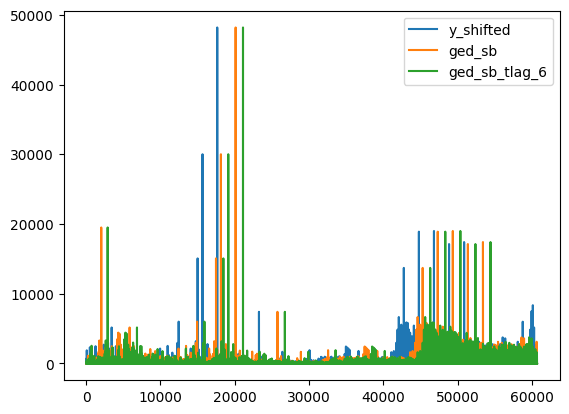

In [834]:
cm_features['y_shifted'] = cm_features.groupby('country_id')['ged_sb'].shift(-15)  # 3 months gap + 12 months prediction
# show na for y_shifted
cm_features[cm_features['y_shifted'].isna()]
# drop na
cm_features = cm_features.dropna()
# plot y_shifted per month
from matplotlib import pyplot as plt

cm_features['y_shifted'].plot()
cm_features['ged_sb'].plot()
cm_features['ged_sb_tlag_6'].plot()
plt.legend()
plt.show()

In [835]:
# drop all ged_sb_tlag_x except for the ged_sb_tlag_6
cm_features = cm_features.drop(columns=['country', 'gleditsch_ward'])
# drop if exists 'year', 'ccode', 'gw_statename'
cm_features = cm_features.drop(columns=['year', 'ccode', 'gw_statename'], errors='ignore')

# cm_features = cm_features.drop(
#     columns=['ged_sb_tlag_2', 'ged_sb_tlag_3', 'ged_sb_tlag_4', 'ged_sb_tlag_5', 'ged_sb_tlag_1', 'ged_sb_tlag_6', ])
# # drop ged_sb, ged_ns, ged_os, acled_sb, acled_sb_ count, acled_os, ged_sb_tsum_24
# cm_features = cm_features.drop(
#     columns=['ged_sb', 'ged_ns', 'ged_os', 'acled_sb', 'acled_sb_count', 'acled_os', 'ged_sb_tsum_24', 'ged_os_tlag_1'])
# # drop splag_1_decay_ged_sb_5, splag_1_decay_ged_os_5, splag_1_decay_ged_ns_5, decay_ged_sb_5, decay_ged_os_5, decay_ged_sb_500, decay_ged_os_100, decay_ged_ns_5, decay_ged_ns_100, decay_acled_sb_5, decay_acled_os_5, decay_acled_ns_5
# cm_features = cm_features.drop(
#     columns=['splag_1_decay_ged_sb_5', 'splag_1_decay_ged_os_5', 'splag_1_decay_ged_ns_5', 'decay_ged_sb_5',
#              'decay_ged_os_5', 'decay_ged_sb_500', 'decay_ged_os_100', 'decay_ged_ns_5', 'decay_ged_ns_100',
#              'decay_acled_sb_5', 'decay_acled_os_5', 'decay_acled_ns_5', 'decay_ged_sb_100'])



In [836]:
# save first 50 rows of the dataset to a new csv file with column names
# cm_features.head(50).to_csv('data/cm_features_first_50.csv', index=True)
# cm_features.head(10)
# prepare dataset for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

cm_features['date'] = pd.to_datetime(cm_features['date'])
cm_features['country_id'] = cm_features['country_id'].astype('category')
cm_features

month_id country_id  ged_sb  ged_ns  ged_os  acled_sb  acled_sb_count  \
0           121          1       0       0       0         0               0   
1           121          2       0       0       0         0               0   
2           121          3       0       0       0         0               0   
3           121          4       0       0      12         0               0   
4           121          7       0       0       0         0               0   
...         ...        ...     ...     ...     ...       ...             ...   
60668       487        242       0       0       0         0               0   
60669       487        243       0       0       0         0               0   
60670       487        244       0       0       0         0               0   
60671       487        245       3     107      12        10               1   
60672       487        246       9     127       5        10               9   

       acled_os  ged_sb_tsum_24  wdi_sp_pop_totl  ...  \
0             0               0           752897  ...   
1             0               0           408360  ...   
2             0               0          1256210  ...   
3             0               0         19275292  ...   
4             0               0         32165766  ...   
...         ...             ...              ...  ...   
60668         0               0         59872579  ...   
60669         0               0         36304408  ...   
60670         0               0          4383849  ...   
60671        50             176         43232093  ...   
60672       165             222         10447666  ...   

       services_efficiency_t48  general_efficiency_t48  water_stress_t48  \
0                    27.952694                1.380676          3.333333   
1                    57.289771                3.922495          2.950609   
2                    35.755839               36.015231         17.956469   
3                    28.946372               26.864392          2.249173   
4                    51.887498               11.043387          7.800305   
...                        ...                     ...               ...   
60668                39.936434                6.594440         12.963241   
60669                51.937737                7.966655         50.751212   
60670                31.864675                3.627975         13.246217   
60671                52.712908                2.478948        118.656388   
60672                35.247547               18.559925          4.226076   

       renewable_internal_pcap_t48  renewable_pcap_t48  \
0                    315260.986388       354505.092577   
1                    264606.831667       264606.831667   
2                      3244.939711         3244.939711   
3                     45295.968642        74555.476336   
4                      9511.721633        28542.982753   
...                            ...                 ...   
60668                  1583.434859         1814.729450   
60669                   825.592620          825.592620   
60670                    96.072254         2738.059240   
60671                   100.382863          948.618053   
60672                  2400.180641         4569.574682   

       splag_1_decay_ged_sb_5  splag_1_decay_ged_os_5  splag_1_decay_ged_ns_5  \
0                    0.093750                1.034032                0.093750   
1                    0.062500                0.062500                0.062500   
2                    0.000000                0.000000                0.000000   
3                    1.062500                1.062500                0.093750   
4                    0.874154                0.156250                0.156250   
...                       ...                     ...                     ...   
60668                4.569363                4.371473                2.248713   
60669                0.911026                0.076540                0.093665   
60670                1

In [837]:
from sklearn.preprocessing import OneHotEncoder

# Define the split date


# features_to_exclude = ['id', 'country', 'ged_sb_tlag_6']
# features = [col for col in cm_features.columns if col not in features_to_exclude]

# X_train = train_df[features]
# y_train = train_df['ged_sb_tlag_6']
# X_test = test_df[features]
# y_test = test_df['ged_sb_tlag_6']
# 
# X_train[features]

In [838]:
# One-hot encode 'country_id'
INCLUDE_COUNTRY_ID = True
if INCLUDE_COUNTRY_ID:
    encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
    encoder.fit_transform(cm_features[['country_id']])
    countries_encoded = encoder.transform(cm_features[['country_id']])
    # rename the columns
    countries_encoded = pd.DataFrame(countries_encoded, columns=encoder.get_feature_names_out(['country_id']))
    countries_encoded = countries_encoded.drop(columns='country_id_1')  # drop country_id_1
    # drop na 

    # countries_encoded
    # merge the encoded features with the original dataset
    cm_features = pd.concat([cm_features, countries_encoded], axis=1)
    cm_features = cm_features.dropna()
cm_features

month_id country_id  ged_sb  ged_ns  ged_os  acled_sb  acled_sb_count  \
0           121          1       0       0       0         0               0   
1           121          2       0       0       0         0               0   
2           121          3       0       0       0         0               0   
3           121          4       0       0      12         0               0   
4           121          7       0       0       0         0               0   
...         ...        ...     ...     ...     ...       ...             ...   
60668       487        242       0       0       0         0               0   
60669       487        243       0       0       0         0               0   
60670       487        244       0       0       0         0               0   
60671       487        245       3     107      12        10               1   
60672       487        246       9     127       5        10               9   

       acled_os  ged_sb_tsum_24  wdi_sp_pop_totl  ...  \
0             0               0           752897  ...   
1             0               0           408360  ...   
2             0               0          1256210  ...   
3             0               0         19275292  ...   
4             0               0         32165766  ...   
...         ...             ...              ...  ...   
60668         0               0         59872579  ...   
60669         0               0         36304408  ...   
60670         0               0          4383849  ...   
60671        50             176         43232093  ...   
60672       165             222         10447666  ...   

       services_efficiency_t48  general_efficiency_t48  water_stress_t48  \
0                    27.952694                1.380676          3.333333   
1                    57.289771                3.922495          2.950609   
2                    35.755839               36.015231         17.956469   
3                    28.946372               26.864392          2.249173   
4                    51.887498               11.043387          7.800305   
...                        ...                     ...               ...   
60668                39.936434                6.594440         12.963241   
60669                51.937737                7.966655         50.751212   
60670                31.864675                3.627975         13.246217   
60671                52.712908                2.478948        118.656388   
60672                35.247547               18.559925          4.226076   

       renewable_internal_pcap_t48  renewable_pcap_t48  \
0                    315260.986388       354505.092577   
1                    264606.831667       264606.831667   
2                      3244.939711         3244.939711   
3                     45295.968642        74555.476336   
4                      9511.721633        28542.982753   
...                            ...                 ...   
60668                  1583.434859         1814.729450   
60669                   825.592620          825.592620   
60670                    96.072254         2738.059240   
60671                   100.382863          948.618053   
60672                  2400.180641         4569.574682   

       splag_1_decay_ged_sb_5  splag_1_decay_ged_os_5  splag_1_decay_ged_ns_5  \
0                    0.093750                1.034032                0.093750   
1                    0.062500                0.062500                0.062500   
2                    0.000000                0.000000                0.000000   
3                    1.062500                1.062500                0.093750   
4                    0.874154                0.156250                0.156250   
...                       ...                     ...                     ...   
60668                4.569363                4.371473                2.248713   
60669                0.911026                0.076540                0.093665   
60670                1

In [839]:
# Split the dataset into training and test sets
# prediction_year = 2018
# test(final model evaluation): Jan 2018 - Jan 2019
# oct 2016 predicts Jan 2018
# oct 2017 predicts Jan 2019
# thus train set is up until Oct 2016
cut_year = prediction_year - 2  # 2016

features_to_oct = pd.Timestamp(year=cut_year, month=10, day=1)  # 2016-Oct-01

# Splitting the dataset
train_df = cm_features[cm_features['date'] < features_to_oct]
# test_df is one year from Oct 2016 to Oct 2017
test_df = cm_features[
    (cm_features['date'] >= pd.Timestamp(year=prediction_year - 2, month=10, day=1)) &  # oct 2016 predicts Jan 2018
    (cm_features['date'] < pd.Timestamp(year=prediction_year - 1, month=10, day=1))]  # oct 2017 predicts Jan 2019

In [840]:
# shuffle the training set
# train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [841]:
# save date column for test_df
test_df_date = test_df['date']
train_df_date = train_df['date']
train_df_country_id = train_df['country_id']
test_df_country_id = test_df['country_id']
train_df_month_id = train_df['month_id']
test_df_month_id = test_df['month_id']

test_df = test_df.drop('date', axis=1)
test_df = test_df.drop("country_id", axis=1)

train_df = train_df.drop('date', axis=1)
train_df = train_df.drop("country_id", axis=1)

INCLUDE_MONTH_ID = True
if not INCLUDE_MONTH_ID:
    test_df = test_df.drop('month_id', axis=1)
    train_df = train_df.drop('month_id', axis=1)

print(test_df_month_id.unique())
print("Difference between bechmark and test month_id:")
print(benchmark_model['month_id'].min() - test_df_month_id.min())

train_df.head(200)

[442 443 444 445 446 447 448 449 450 451 452 453]
Difference between bechmark and test month_id:
15


month_id  ged_sb  ged_ns  ged_os  acled_sb  acled_sb_count  acled_os  \
0         121       0       0       0         0               0         0   
1         121       0       0       0         0               0         0   
2         121       0       0       0         0               0         0   
3         121       0       0      12         0               0         0   
4         121       0       0       0         0               0         0   
..        ...     ...     ...     ...       ...             ...       ...   
202       122       0       0       0         0               0         0   
203       122       6     573       0         0               0         0   
204       122      22       0       0         0               0         0   
205       122       0       0       0         0               0         0   
206       122       0       0       0         0               0         0   

     ged_sb_tsum_24  wdi_sp_pop_totl  ged_sb_tlag_1  ...  \
0                 0           752897              0  ...   
1                 0           408360              0  ...   
2                 0          1256210              0  ...   
3                 0         19275292              0  ...   
4                 0         32165766              0  ...   
..              ...              ...            ...  ...   
202               0         10089498              0  ...   
203             788          3525502              2  ...   
204             476         53305234             12  ...   
205               0          7619567              0  ...   
206               0          5132594              0  ...   

     irr_agr_efficiency_t48  services_efficiency_t48  general_efficiency_t48  \
0                  0.151779                27.952694                1.380676   
1                  0.722621                57.289771                3.922495   
2                  1.671158                35.755839               36.015231   
3                  0.443153                28.946372               26.864392   
4                  0.061311                51.887498               11.043387   
..                      ...                      ...                     ...   
202                0.577257               144.990569               17.916303   
203                0.556103                76.057566               15.995655   
204                0.342143                27.339480               10.436152   
205                3.083907               177.390641               68.406747   
206                3.749398               209.839046              342.476922   

     water_stress_t48  renewable_internal_pcap_t48  renewable_pcap_t48  \
0            3.333333                315260.986388       354505.092577   
1            2.950609                264606.831667       264606.831667   
2           17.956469                  3244.939711         3244.939711   
3            2.249173                 45295.968642        74555.476336   
4            7.800305                  9511.721633        28542.982753   
..                ...                          ...                 ...   
202         12.055837                  5791.244218         6829.674216   
203         34.548653                  1803.919918         1692.302373   
204         23.471366                  4528.358406         4221.148188   
205         10.009947                  7212.743002        10189.638750   
206         41.148368                  1173.099193         1173.099193   

     splag_1_decay_ged_sb_5  splag_1_decay_ged_os_5  splag_1_decay_ged_ns_5  \
0                  0.093750                1.034032                0.093750   
1                  0.062500                0.062500                0.062500   
2                  0.000000                0.000000                0.000000   
3                  1.062500                1.062500                0.093750   
4                  0.874154                0.156250                0.156250   
..                      ...        

In [842]:
target = 'y_shifted'
X_train = train_df.drop(target, axis=1)
y_train = train_df[target]
X_test = test_df.drop(target, axis=1)
y_test = test_df[target]

In [843]:
y_train

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
52894     0.0
52895     0.0
52896     0.0
52897     4.0
52898    62.0
Name: y_shifted, Length: 52105, dtype: float64

In [844]:
# assert month_id, country_id, date are not in the features
# assert 'month_id' not in X_train.columns
print('month_id' in X_train.columns)
X_test

True


month_id  ged_sb  ged_ns  ged_os  acled_sb  acled_sb_count  acled_os  \
52899       442       0       0       0         0               0         0   
52900       442       0       0       0         0               0         0   
52901       442       0       0       0         0               0         0   
52902       442       0       0       2         0               0         0   
52903       442       0       0       0         0               0         0   
...         ...     ...     ...     ...       ...             ...       ...   
54922       453       0       0       0         0               0         3   
54923       453       0       0       0         0               1         0   
54924       453       0       0       0         0               0         0   
54925       453      19       0       9        22               6        29   
54926       453      32       0       0       206              26        38   

       ged_sb_tsum_24  wdi_sp_pop_totl  ged_sb_tlag_1  ...  \
52899               0           755031              0  ...   
52900               0           575475              0  ...   
52901               0          1460177              0  ...   
52902               0         30529716              0  ...   
52903               0         43131966              0  ...   
...               ...              ...            ...  ...   
54922               0         54401802              0  ...   
54923               0         35107264              0  ...   
54924               0          4051890              0  ...   
54925            1551         39377169              0  ...   
54926            1191         11066105             20  ...   

       ind_efficiency_t48  irr_agr_efficiency_t48  services_efficiency_t48  \
52899           41.965579                0.125736                20.383693   
52900           11.840596                0.934625                48.234420   
52901           86.825329                1.622908                52.342918   
52902          213.283572                0.445294                33.185070   
52903           36.670942                0.119870                58.861236   
...                   ...                     ...                      ...   
54922          412.971789                0.132565                33.875609   
54923          106.996363                0.380566                46.472747   
54924           56.575372                0.200425                23.185089   
54925          161.387656                0.203982                38.842079   
54926           12.105882                0.018451                10.037360   

       general_efficiency_t48  water_stress_t48  renewable_internal_pcap_t48  \
52899                1.576103          3.298402                319036.694515   
52900                7.120108          3.950609                182911.620431   
52901               61.731641         20.326481                  2855.402846   
52902               15.320483          7.540367                 27417.474509   
52903               13.085494         10.456664                  6993.141644   
...                       ...               ...                          ...   
54922                5.553777         12.963241                  1732.561444   
54923                7.244581         50.751212                   860.133333   
54924                3.152180         13.246217                   104.780780   
54925                2.015564        118.656388                   107.896543   
54926                7.090368          4.226076                  2510.855830   

       renewable_pcap_t48  splag_1_decay_ged_sb_5  splag_1_decay_ged_os_5  \
52899       358750.805866                0.000265                1.060724   
52900       182911.620431                0.000006                0.118033   
52901         2855.402846                0.000000                0.000000   
52902        45128.141272                0.890905                0.563483   
52903        20985.172720     

In [845]:
import xgboost as xgb

# Prepare DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)

dtest = xgb.DMatrix(X_test, label=y_test)

import xgboost as xgb
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Specify parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'learning_rate': 0.1,
}

# Train the model
num_round = 40
bst = xgb.train(params, dtrain, num_round)

# Make predictions
xgb_train_predictions = bst.predict(dtrain)
xgb_predictions = bst.predict(dtest)
# Discard all negative predictions and set them to 0. This is because the target variable is non-negative
# and following the ViEWS technical report they use GAM that converts negative predictions to 0 and then almost linear
xgb_train_predictions = [max(0, pred) for pred in xgb_train_predictions]
xgb_predictions = [max(0, pred) for pred in xgb_predictions]

In [846]:
from ngboost import NGBRegressor

# supress RuntimeWarning for NGBRegressor
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    ngb = NGBRegressor(n_estimators=150, verbose_eval=30).fit(X_train, y_train)
ngb_train_predictions = ngb.predict(X_train)
ngb_predictions = ngb.predict(X_test)
ngb_predictions_dist = ngb.pred_dist(X_test)

ngb_train_predictions = [max(0, pred) for pred in ngb_train_predictions]
ngb_predictions = [max(0, pred) for pred in ngb_predictions]

[iter 0] loss=7.2834 val_loss=0.0000 scale=0.0625 norm=2.5650
[iter 30] loss=6.4356 val_loss=0.0000 scale=4.0000 norm=125.7853
[iter 60] loss=6.1018 val_loss=0.0000 scale=2.0000 norm=53.3751
[iter 90] loss=5.7702 val_loss=0.0000 scale=2.0000 norm=47.2395
[iter 120] loss=5.4995 val_loss=0.0000 scale=2.0000 norm=43.2083


In [847]:
# map predictions to months based on the test_df
test_df['predictions'] = xgb_predictions
test_df['ngb_predictions'] = ngb_predictions
train_df['predictions'] = xgb_train_predictions
train_df['ngb_predictions'] = ngb_train_predictions

# add date column back to test_df and add to each date shift of 15 months
test_df['date'] = test_df_date + pd.DateOffset(months=15)
train_df['date'] = train_df_date
test_df['country_id'] = test_df_country_id
train_df['country_id'] = train_df_country_id
test_df['month_id'] = test_df_month_id
train_df['month_id'] = train_df_month_id

test_df

month_id  ged_sb  ged_ns  ged_os  acled_sb  acled_sb_count  acled_os  \
52899       442       0       0       0         0               0         0   
52900       442       0       0       0         0               0         0   
52901       442       0       0       0         0               0         0   
52902       442       0       0       2         0               0         0   
52903       442       0       0       0         0               0         0   
...         ...     ...     ...     ...       ...             ...       ...   
54922       453       0       0       0         0               0         3   
54923       453       0       0       0         0               1         0   
54924       453       0       0       0         0               0         0   
54925       453      19       0       9        22               6        29   
54926       453      32       0       0       206              26        38   

       ged_sb_tsum_24  wdi_sp_pop_totl  ged_sb_tlag_1  ...  \
52899               0           755031              0  ...   
52900               0           575475              0  ...   
52901               0          1460177              0  ...   
52902               0         30529716              0  ...   
52903               0         43131966              0  ...   
...               ...              ...            ...  ...   
54922               0         54401802              0  ...   
54923               0         35107264              0  ...   
54924               0          4051890              0  ...   
54925            1551         39377169              0  ...   
54926            1191         11066105             20  ...   

       renewable_internal_pcap_t48  renewable_pcap_t48  \
52899                319036.694515       358750.805866   
52900                182911.620431       182911.620431   
52901                  2855.402846         2855.402846   
52902                 27417.474509        45128.141272   
52903                  6993.141644        20985.172720   
...                            ...                 ...   
54922                  1732.561444         1985.639169   
54923                   860.133333          860.133333   
54924                   104.780780         2986.252238   
54925                   107.896543         1019.622335   
54926                  2510.855830         4780.283215   

       splag_1_decay_ged_sb_5  splag_1_decay_ged_os_5  splag_1_decay_ged_ns_5  \
52899                0.000265                1.060724                0.929863   
52900                0.000006                0.118033                0.686980   
52901                0.000000                0.000000                0.000000   
52902                0.890905                0.563483                0.712510   
52903                0.000082                0.060733                0.690568   
...                       ...                     ...                     ...   
54922                3.509679                4.837398                2.607859   
54923                1.121441                0.204336                0.250054   
54924                2.210346                1.319249                1.270859   
54925                6.239003                5.073056                4.485709   
54926                4.655549                5.287363                5.390793   

       y_shifted  predictions  ngb_predictions       date  country_id  
52899        0.0     0.224733         4.044130 2018-01-01           1  
52900        0.0     0.224733         4.044130 2018-01-01           2  
52901        0.0     0.224733         4.044130 2018-01-01           3  
52902        0.0     0.561162         6.410505 2018-01-01           4  
52903        0.0     0.224733         4.044130 2018-01-01           7  
...          ...          ...              ...        ...         ...  
54922        0.0     2.765664         4.044130 2018-12-01         242  
54923        0.0     1.460537         4.044130 2018-12-01         2

In [848]:
# TODO: Improve metrics and use all metrics from the VIEWS competition
# Calculate RMSE
train_rmse = sqrt(mean_squared_error(y_train, xgb_train_predictions))
ngb_train_rmse = sqrt(mean_squared_error(y_train, ngb_train_predictions))
rmse = sqrt(mean_squared_error(y_test, xgb_predictions))
rmse_ngb = sqrt(mean_squared_error(y_test, ngb_predictions))
# actuals_rmse = sqrt(mean_squared_error(actuals_model['ged_sb'], predictions))
# benchmark_rmse = sqrt(mean_squared_error(y_test, benchmark_model['outcome']))
actuals_bench_rmse = sqrt(mean_squared_error(actuals_model['ged_sb'], benchmark_model['outcome']))

print(f"Include country_id: {INCLUDE_COUNTRY_ID}")
print(f"Include month_id: {INCLUDE_MONTH_ID}")

# TODO: Improve metrics and use all metrics from the VIEWS competition
print(f"XGB [train predictions] RMSE: {train_rmse}")
print(f"XGB [test predictions]  RMSE YTEST VS PREDICTIONS: {rmse}")

print(f"\nNGB [train predictions] RMSE NGB: {ngb_train_rmse}")
print(f"NGB [test predictions]  RMSE NGB: {rmse_ngb}")
# print(f"RMSE YTEST VS ACTUALS: {actuals_rmse}")
# print(f"RMSE YTEST VS BENCHMARK: {benchmark_rmse}")
print(f"\nBenchmark: RMSE ACTUALS VS BENCHMARK: {actuals_bench_rmse}")

Include country_id: False
Include month_id: True
XGB [train predictions] RMSE: 153.11324241330223
XGB [test predictions]  RMSE YTEST VS PREDICTIONS: 141.18295751680398

NGB [train predictions] RMSE NGB: 180.48760550073635
NGB [test predictions]  RMSE NGB: 164.21949484272872

Benchmark: RMSE ACTUALS VS BENCHMARK: 188.86519776522132


In [849]:
DO_IMPORTANCE = False
# print all feature importance sorted
feature_importance = bst.get_fscore()
feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
print(feature_importance)

if DO_IMPORTANCE:
    from xgboost import plot_importance

    # plot
    plot_importance(bst, max_num_features=10)
    plt.show()

    import shap

    explainer = shap.TreeExplainer(bst)
    # dtrain = xgb.DMatrix(X_train, label=y_train)
    dtrain.feature_names = X_train.columns.tolist()
    explanation = explainer(dtrain)
    explanation = shap.Explanation(
        values=explanation.values,
        base_values=explanation.base_values,
        data=explanation.data,
        feature_names=X_train.columns.tolist()
    )
    shap.plots.beeswarm(explanation)



[('month_id', 268.0), ('ged_sb', 111.0), ('ged_os_tlag_1', 85.0), ('ged_sb_tlag_2', 50.0), ('ged_sb_tlag_3', 50.0), ('ged_sb_tlag_1', 44.0), ('acled_sb', 43.0), ('ged_os', 42.0), ('ged_sb_tsum_24', 40.0), ('decay_ged_sb_100', 32.0), ('splag_1_decay_ged_os_5', 32.0), ('wdi_sm_pop_totl_zs', 31.0), ('ged_ns', 30.0), ('ged_sb_tlag_6', 29.0), ('decay_acled_sb_5', 23.0), ('wdi_sp_dyn_imrt_in', 21.0), ('acled_os', 20.0), ('ged_sb_tlag_5', 20.0), ('splag_1_decay_ged_sb_5', 19.0), ('ged_sb_tlag_4', 17.0), ('wdi_sm_pop_refg_or', 17.0), ('decay_ged_ns_5', 17.0), ('decay_ged_ns_100', 17.0), ('decay_ged_os_100', 16.0), ('wdi_sp_pop_totl', 15.0), ('services_efficiency_t48', 14.0), ('splag_1_decay_ged_ns_5', 14.0), ('wdi_sl_tlf_totl_fe_zs', 12.0), ('vdem_v2clrgunev', 12.0), ('wdi_sp_dyn_le00_in', 10.0), ('wdi_sh_sta_maln_zs', 10.0), ('vdem_v2xcl_dmove', 10.0), ('vdem_v2xpe_exlpol', 10.0), ('vdem_v2xeg_eqaccess', 9.0), ('decay_ged_sb_500', 9.0), ('vdem_v2x_delibdem', 8.0), ('splag_vdem_v2x_accountabil

In [850]:
# for each timeseries plot the actual and predicted values
import matplotlib.pyplot as plt
# map back id to country name
# country_id = index + 1
# y_test.reset_index(inplace=True, drop=True)
# y_test = y_test.to_frame()
# y_test['country_id'] = y_test.index + 1



In [851]:
# map country_id to country name
# country_list = pd.read_csv('data/country_list.csv') 
# country_list
# y_test["country_name"] = y_test["country_id"].map(country_list.set_index('country_id')['name'])
# y_test

In [888]:
import numpy as np

dir(ngb.pred_dist(X_test).scale)
# ngb.pred_dist(X_test).
# save std of the predictions
ngb_predictions_std = np.sqrt(ngb.pred_dist(X_test).var)
# add std to test_df
test_df['ngb_predictions_std'] = ngb_predictions_std

test_df

month_id  ged_sb  ged_ns  ged_os  acled_sb  acled_sb_count  acled_os  \
0          442       0       0       0         0               0         0   
1          442       0       0       0         0               0         0   
2          442       0       0       0         0               0         0   
3          442       0       0       2         0               0         0   
4          442       0       0       0         0               0         0   
...        ...     ...     ...     ...       ...             ...       ...   
2023       453       0       0       0         0               0         3   
2024       453       0       0       0         0               1         0   
2025       453       0       0       0         0               0         0   
2026       453      19       0       9        22               6        29   
2027       453      32       0       0       206              26        38   

      ged_sb_tsum_24  wdi_sp_pop_totl  ged_sb_tlag_1  ...  renewable_pcap_t48  \
0                  0           755031              0  ...       358750.805866   
1                  0           575475              0  ...       182911.620431   
2                  0          1460177              0  ...         2855.402846   
3                  0         30529716              0  ...        45128.141272   
4                  0         43131966              0  ...        20985.172720   
...              ...              ...            ...  ...                 ...   
2023               0         54401802              0  ...         1985.639169   
2024               0         35107264              0  ...          860.133333   
2025               0          4051890              0  ...         2986.252238   
2026            1551         39377169              0  ...         1019.622335   
2027            1191         11066105             20  ...         4780.283215   

      splag_1_decay_ged_sb_5  splag_1_decay_ged_os_5  splag_1_decay_ged_ns_5  \
0                   0.000265                1.060724                0.929863   
1                   0.000006                0.118033                0.686980   
2                   0.000000                0.000000                0.000000   
3                   0.890905                0.563483                0.712510   
4                   0.000082                0.060733                0.690568   
...                      ...                     ...                     ...   
2023                3.509679                4.837398                2.607859   
2024                1.121441                0.204336                0.250054   
2025                2.210346                1.319249                1.270859   
2026                6.239003                5.073056                4.485709   
2027                4.655549                5.287363                5.390793   

      y_shifted  predictions  ngb_predictions       date  country_id  \
0           0.0     0.224733         4.044130 2018-01-01           1   
1           0.0     0.224733         4.044130 2018-01-01           2   
2           0.0     0.224733         4.044130 2018-01-01           3   
3           0.0     0.561162         6.410505 2018-01-01           4   
4           0.0     0.224733         4.044130 2018-01-01           7   
...         ...          ...              ...        ...         ...   
2023        0.0     2.765664         4.044130 2018-12-01         242   
2024        0.0     1.460537         4.044130 2018-12-01         243   
2025        0.0     1.648852         4.903108 2018-12-01         244   
2026        9.0    78.879440        43.829064 2018-12-01         245   
2027       39.0   104.232246        41.622641 2018-12-01         246   

      ngb_predictions_std  
0               56.699594  
1               56.699594  
2               56.699594  
3               56.699594  
4               56.699594  
...                   ...  
2023            59.258768  
2024            56.699594  
2025            67

Unique months: [442 443 444 445 446 447 448 449 450 451 452 453]


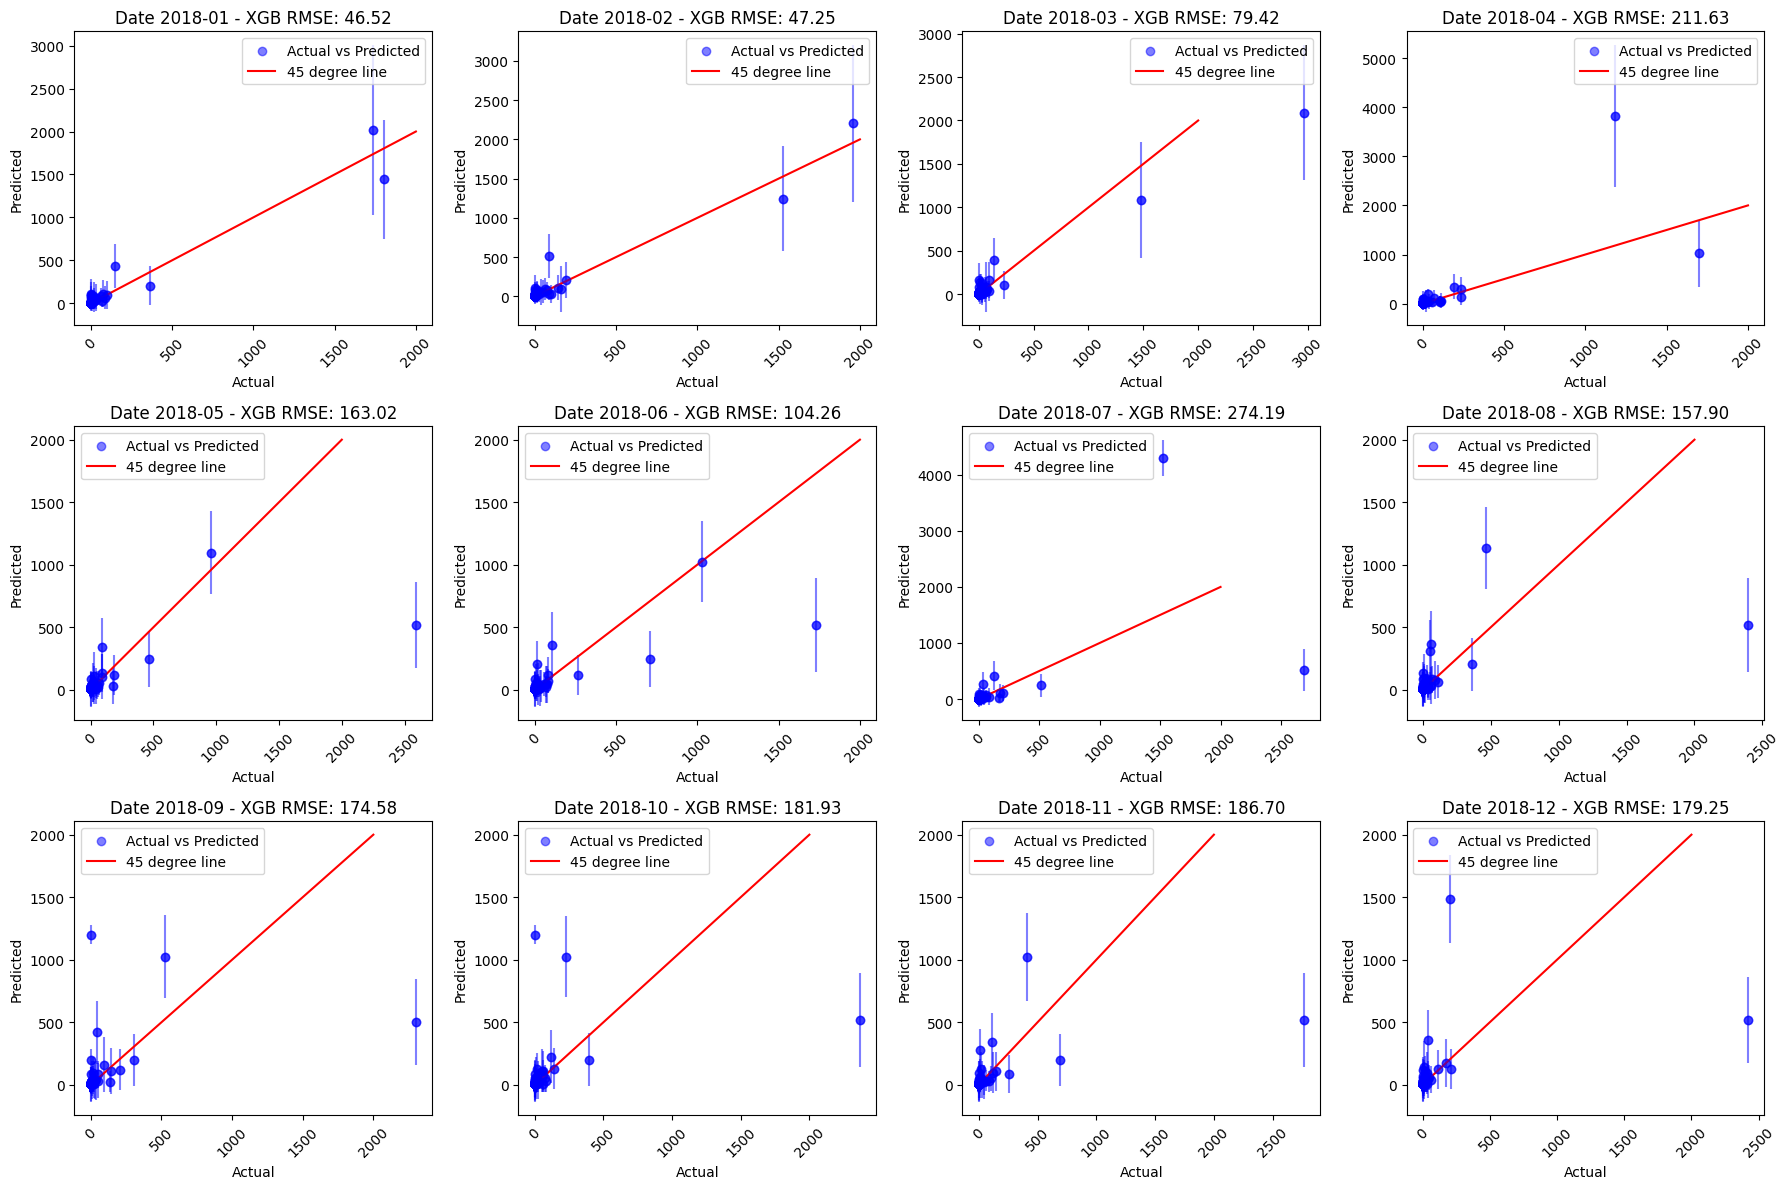

In [889]:
# get all unique months sorted from test_df
# test_df['month_id'].unique()
# # get target and predictions for each month
# for month_id in test_df['month_id'].unique():
#     # get target and predictions for each month
#     target_month = test_df[test_df['month_id'] == month_id][target]
#     predictions_month = test_df[test_df['month_id'] == month_id]['predictions']
#     # plot actual vs predicted for each month
#     plt.figure(figsize=(10, 6))
#     plt.scatter(target_month, predictions_month, color='blue', label='Actual', alpha=0.5)
#     plt.title(f'Actual vs Predicted Values for month {month_id}')
#     plt.xlabel('Actual')
#     plt.ylabel('Predicted')
#     plt.xscale('log')
#     plt.yscale('log')
#     plt.plot([0, 1000], [0, 1000], color='red', label='45 degree line')
#     plt.legend()
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()

import matplotlib.pyplot as plt

# Assuming test_df is your DataFrame, and 'target' and 'predictions' are columns in it
unique_months = test_df['month_id'].unique()
n_months = len(unique_months)
print("Unique months:", unique_months)

# Calculate the grid size for the subplot (simple square root approximation for a square grid)
grid_size_x = int(n_months ** 0.5) + (1 if n_months % int(n_months ** 0.5) else 0)
grid_size_y = grid_size_x + 1

# print(f'Grid size: {grid_size}')
# Set overall figure size
plt.figure(figsize=(grid_size_x * 6, grid_size_y * 3))  # Adjust the size factors (6, 4) based on your preference

for index, month_id in enumerate(unique_months, start=1):
    this_month = test_df[test_df['month_id'] == month_id]
    mean_sq_error = sqrt(mean_squared_error(this_month[target], this_month['ngb_predictions']))
    current_date = this_month["date"].iloc[0]
    target_month = this_month[target]
    predictions_month = this_month['ngb_predictions']
    predictions_std_month = this_month['ngb_predictions_std']

    # Create subplot for current month
    plt.subplot(grid_size_x, grid_size_y, index)
    # TODO: plot standard deviation as well as a shaded area around the predictions
    plt.scatter(target_month, predictions_month, color='blue', label='Actual vs Predicted', alpha=0.5)
    plt.errorbar(target_month, predictions_month, yerr=predictions_std_month, fmt='o', color='blue', alpha=0.5)

    # print current_date in YY/MM format
    print_date = current_date.strftime('%Y-%m')
    plt.title(f'Date {print_date} - XGB RMSE: {mean_sq_error:.2f}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    # plt.xscale('log')
    # plt.yscale('log')
    plt.plot([0, 2000], [0, 2000], color='red', label='45 degree line')
    plt.legend()
    plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [853]:
# plot series of actual vs predicted for each country
# country_ids = test_df['country_id'].unique().tolist()[:1]
# # remove country id if it 
# 
# 
# for country_id in country_ids:
#     # get target and predictions for each country
#     this_country = test_df[test_df['country_id'] == country_id]
#     # this_country.reset_index(inplace=True, drop=True)
#     target_country = this_country[target]
#     predictions_country = this_country['predictions']
#     # plot actual vs predicted for each country
#     plt.figure(figsize=(10, 6))
#     # plot train set actual
#     plt.plot(train_df[train_df['country_id'] == country_id]['y_shifted'], label='Train', color='green')
# 
#     plt.plot(target_country, label='Actual', color='blue')
#     plt.plot(predictions_country, label='Predicted', color='red')
#     # set x as date according to the month_id
#     # plt.xticks(cm_features[cm_features['country_id'] == country_id]['month_id'], cm_features[cm_features['country_id'] == country_id]['date'], rotation=45)
#     plt.xlabel('date')
#     plt.ylabel('Ged_sb')
#     plt.legend()
#     # plt.xlim(0, len(this_country['date']))
#     plt.title(f'Actual vs Predicted Values for country {country_id}')
#     plt.show()


Skipping Guyana as all actuals are 0
Skipping Suriname as all actuals are 0
Skipping Trinidad and Tobago as all actuals are 0
Skipping Venezuela as all actuals are 0
Skipping Argentina as all actuals are 0
Skipping Bolivia as all actuals are 0
Skipping Brazil as all actuals are 0
Skipping Chile as all actuals are 0
Skipping Ecuador as all actuals are 0
Skipping Paraguay as all actuals are 0
Skipping Peru as all actuals are 0
Skipping Uruguay as all actuals are 0
Skipping Guatemala as all actuals are 0
Skipping Mexico as all actuals are 0
Skipping Barbados as all actuals are 0
Skipping Dominican Republic as all actuals are 0
Skipping Haiti as all actuals are 0
Skipping Jamaica as all actuals are 0


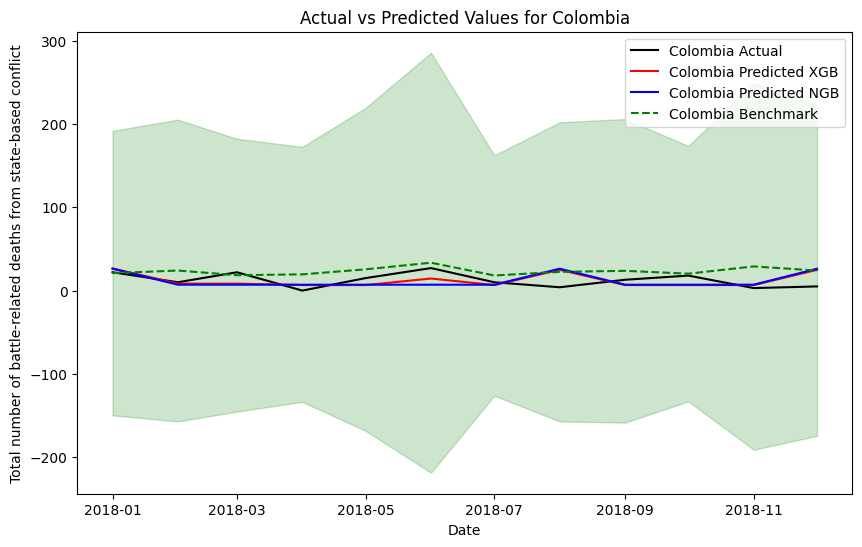

Skipping Costa Rica as all actuals are 0
Skipping Cuba as all actuals are 0
Skipping El Salvador as all actuals are 0
Skipping Honduras as all actuals are 0
Skipping Nicaragua as all actuals are 0
Skipping Panama as all actuals are 0
Skipping Iceland as all actuals are 0
Skipping Ireland as all actuals are 0
Skipping United Kingdom as all actuals are 0
Skipping Cape Verde as all actuals are 0
Skipping Cote d'Ivoire as all actuals are 0
Skipping Ghana as all actuals are 0
Skipping Liberia as all actuals are 0
Skipping Portugal as all actuals are 0
Skipping Spain as all actuals are 0


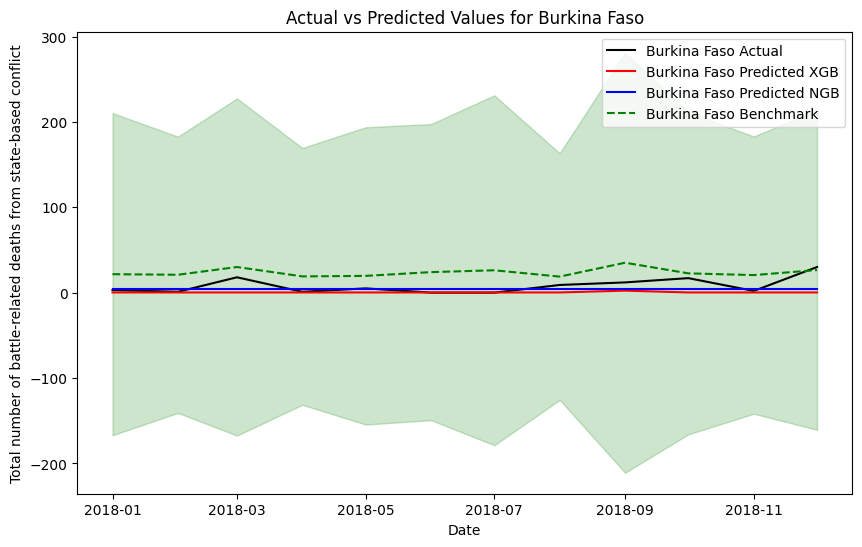

Skipping Guinea as all actuals are 0
Skipping Guinea-Bissau as all actuals are 0


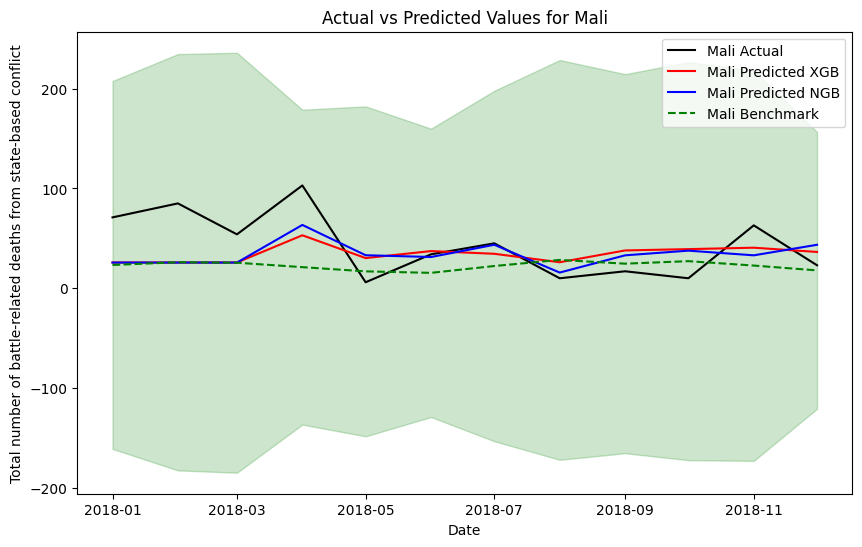

Skipping Senegal as all actuals are 0
Skipping Sierra Leone as all actuals are 0
Skipping The Gambia as all actuals are 0
Skipping Djibouti as all actuals are 0
Skipping Eritrea as all actuals are 0


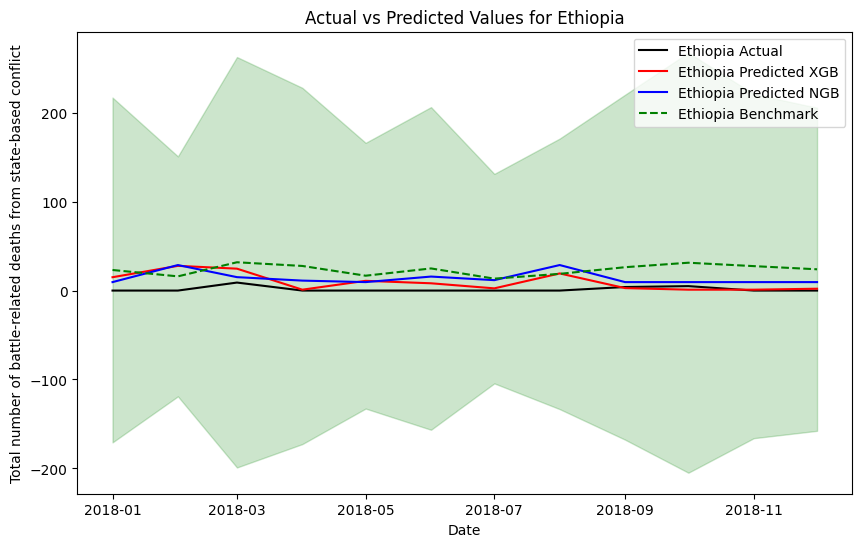

Skipping Mongolia as all actuals are 0


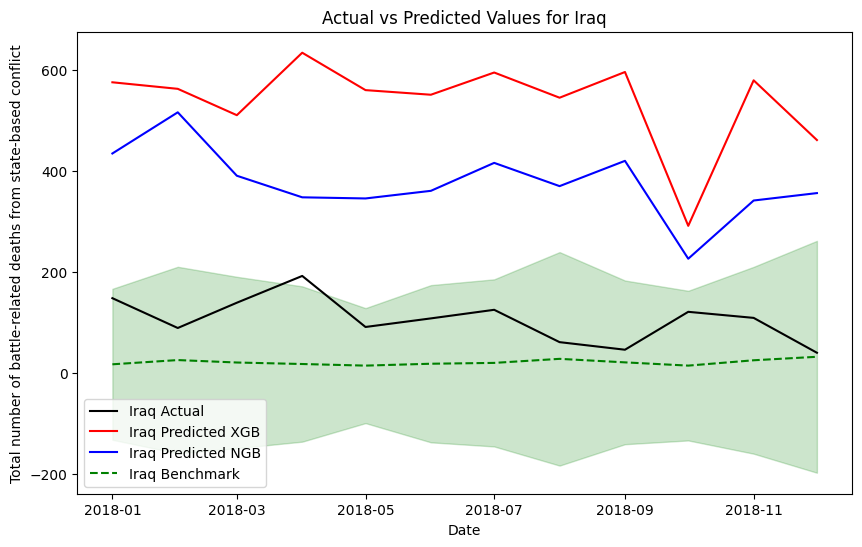

Skipping Jordan as all actuals are 0
Skipping Kazakhstan as all actuals are 0
Skipping Norway as all actuals are 0


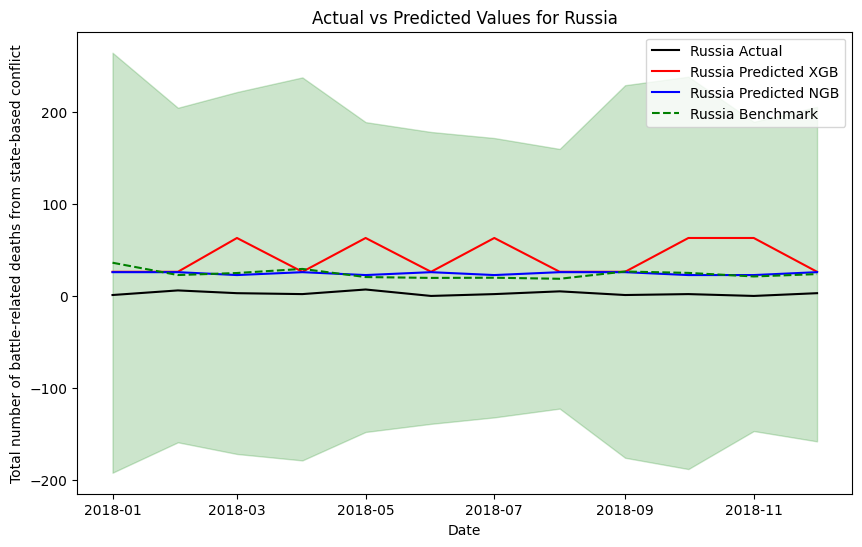

Skipping Sweden as all actuals are 0


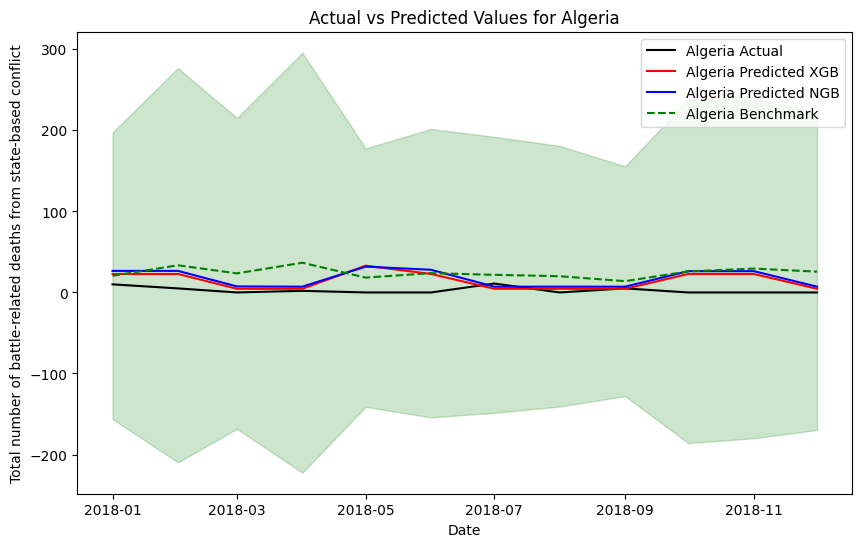

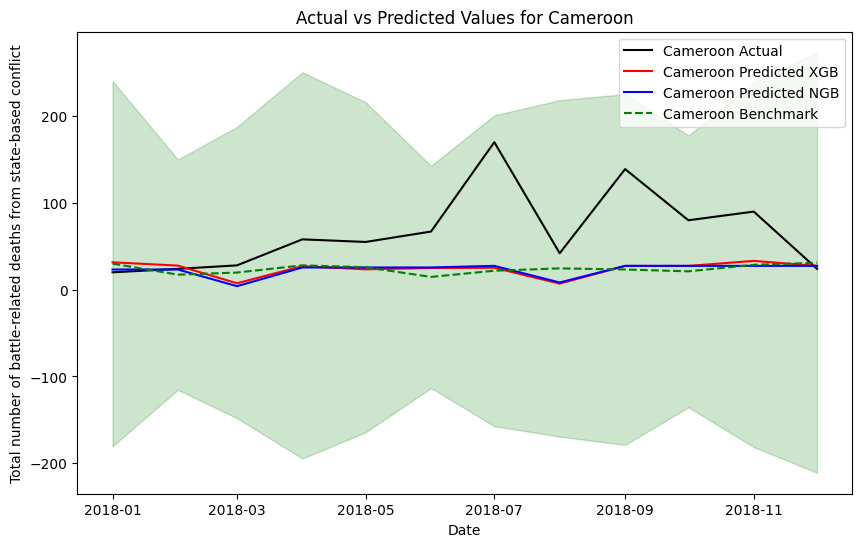

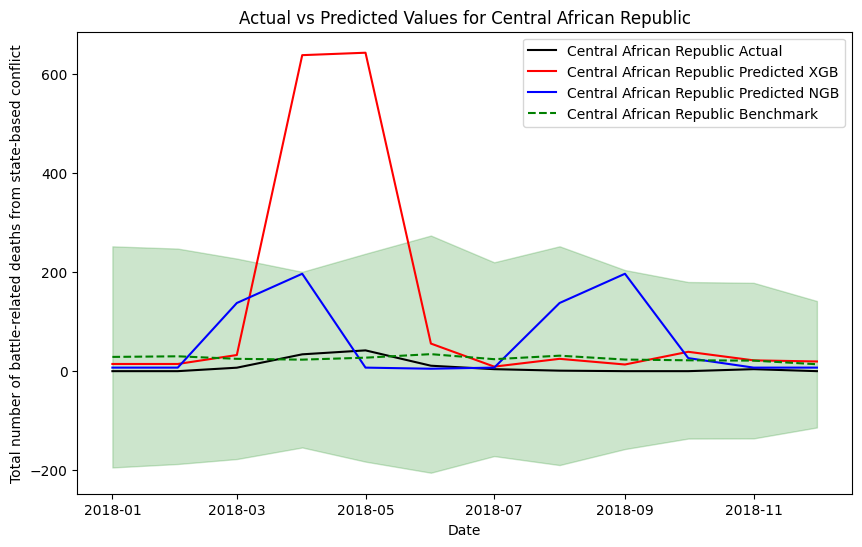

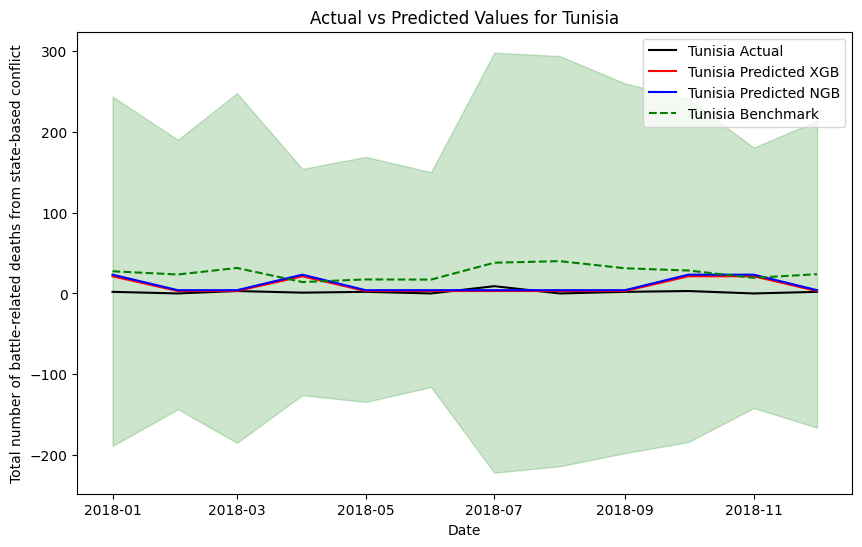

Skipping Benin as all actuals are 0
Skipping Equatorial Guinea as all actuals are 0


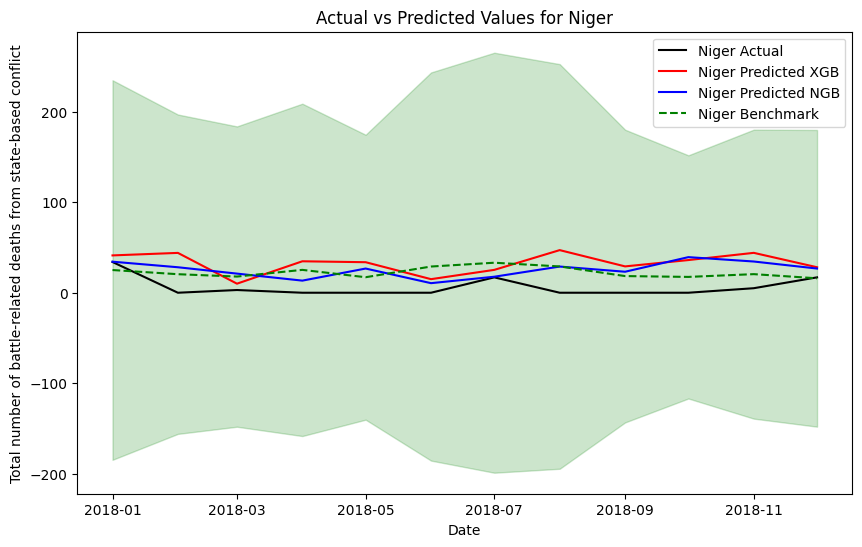

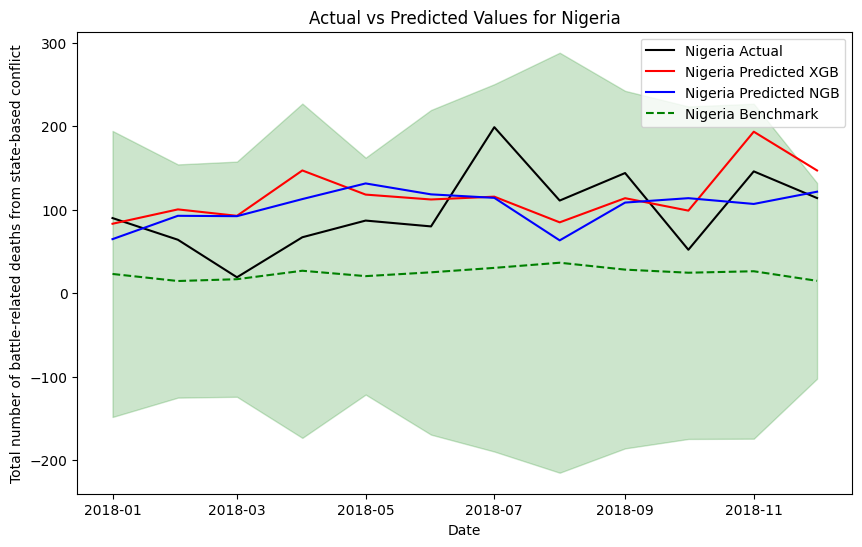

Skipping Togo as all actuals are 0
Skipping Albania as all actuals are 0
Skipping Bosnia and Herzegovina as all actuals are 0
Skipping Croatia as all actuals are 0
Skipping Italy as all actuals are 0
Skipping Macedonia as all actuals are 0
Skipping Malta as all actuals are 0
Skipping Bulgaria as all actuals are 0
Skipping Cyprus as all actuals are 0
Skipping Georgia as all actuals are 0
Skipping Greece as all actuals are 0


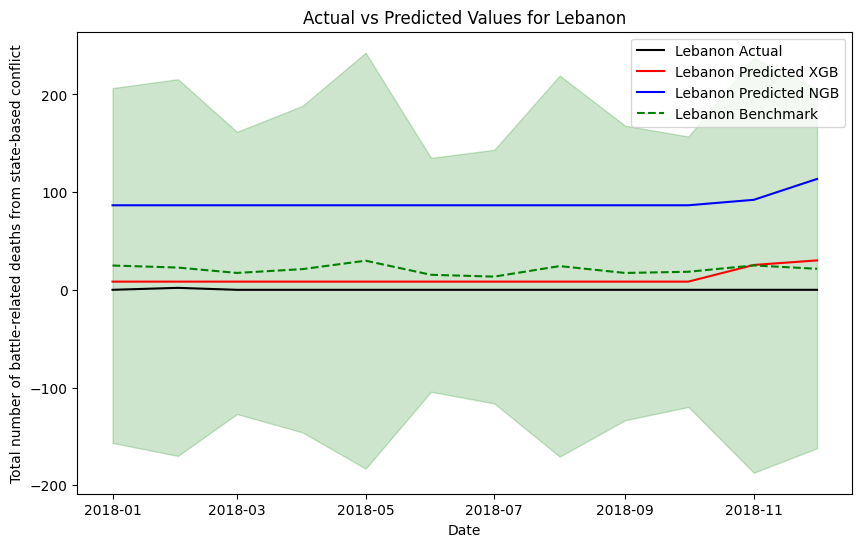

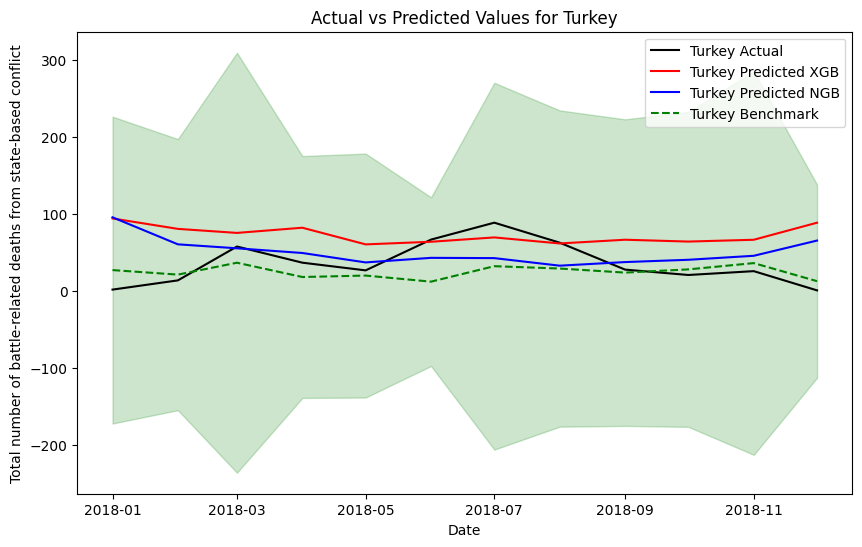

Skipping Austria as all actuals are 0
Skipping Czech Republic as all actuals are 0
Skipping Denmark as all actuals are 0
Skipping Hungary as all actuals are 0
Skipping Poland as all actuals are 0
Skipping Slovakia as all actuals are 0
Skipping Slovenia as all actuals are 0


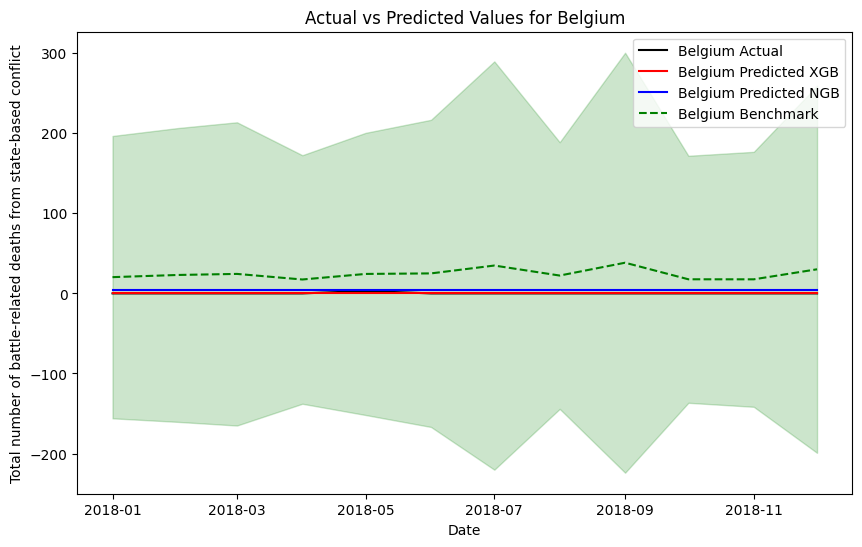

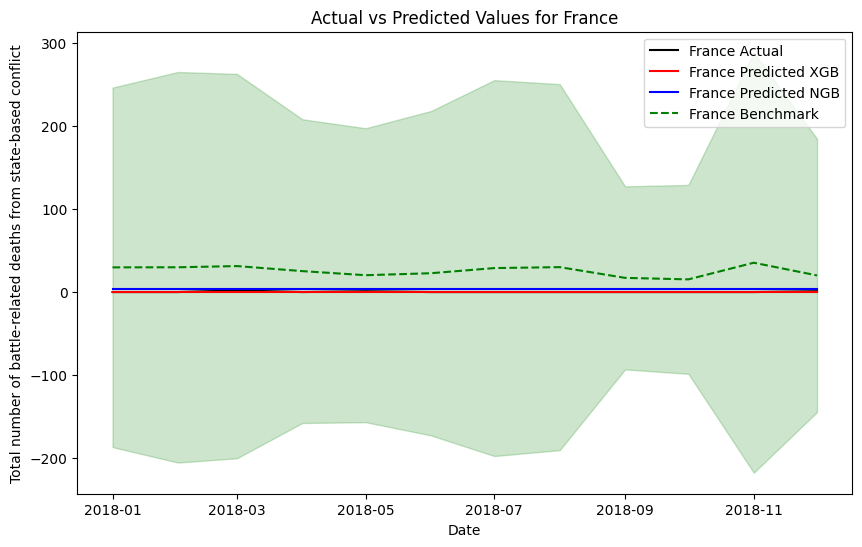

Skipping Luxembourg as all actuals are 0
Skipping Netherlands as all actuals are 0
Skipping Switzerland as all actuals are 0
Skipping Belarus as all actuals are 0
Skipping Estonia as all actuals are 0
Skipping Finland as all actuals are 0
Skipping Latvia as all actuals are 0
Skipping Lithuania as all actuals are 0
Skipping Moldova as all actuals are 0
Skipping Romania as all actuals are 0


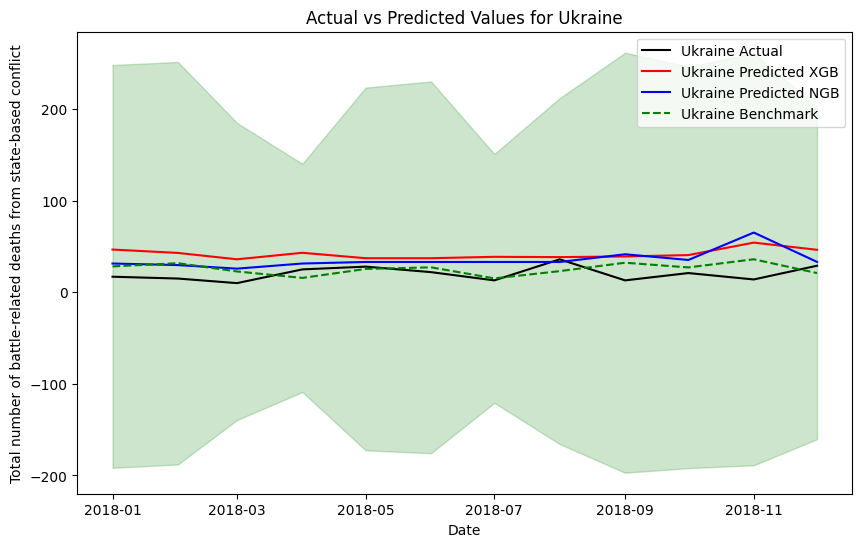

Skipping Maldives as all actuals are 0
Skipping Oman as all actuals are 0


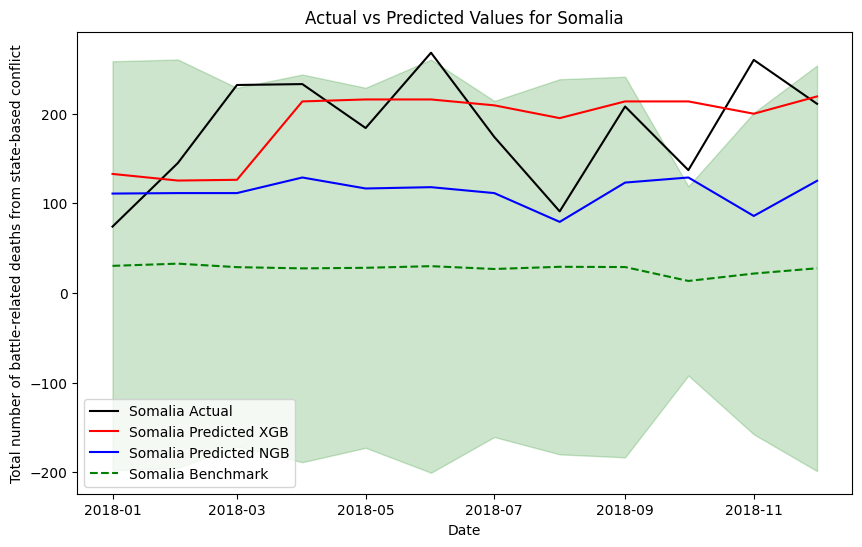

Skipping Sri Lanka as all actuals are 0
Skipping Turkmenistan as all actuals are 0
Skipping Uzbekistan as all actuals are 0


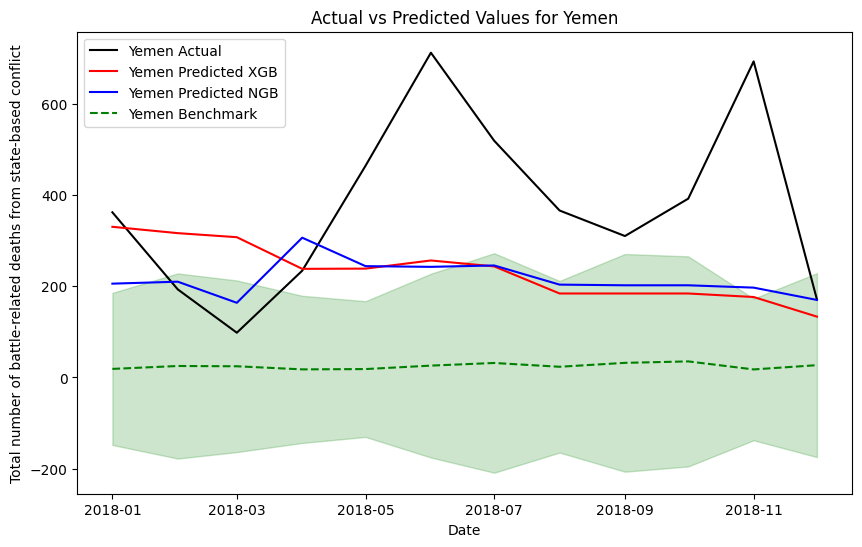

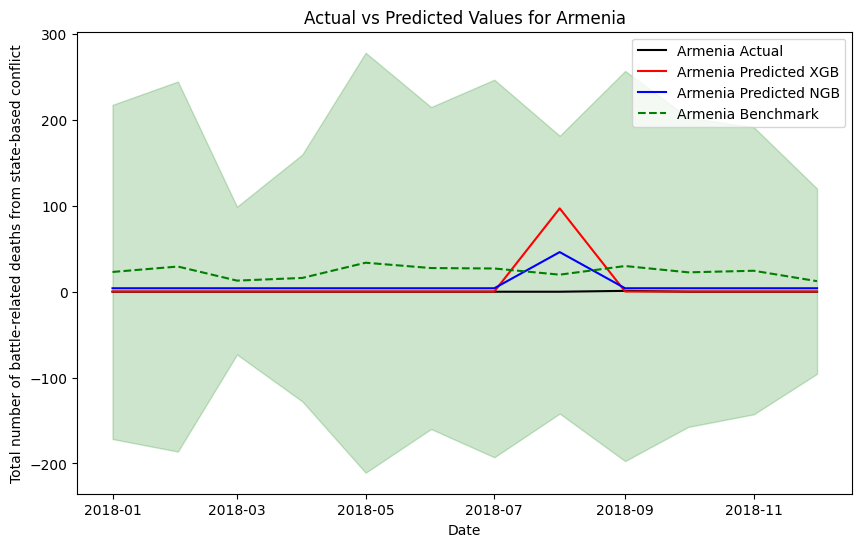

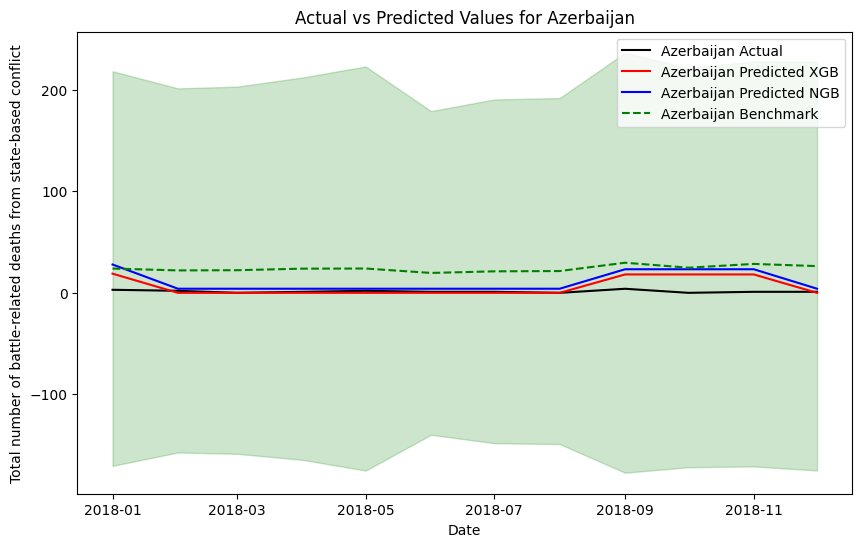

Skipping Bahrain as all actuals are 0


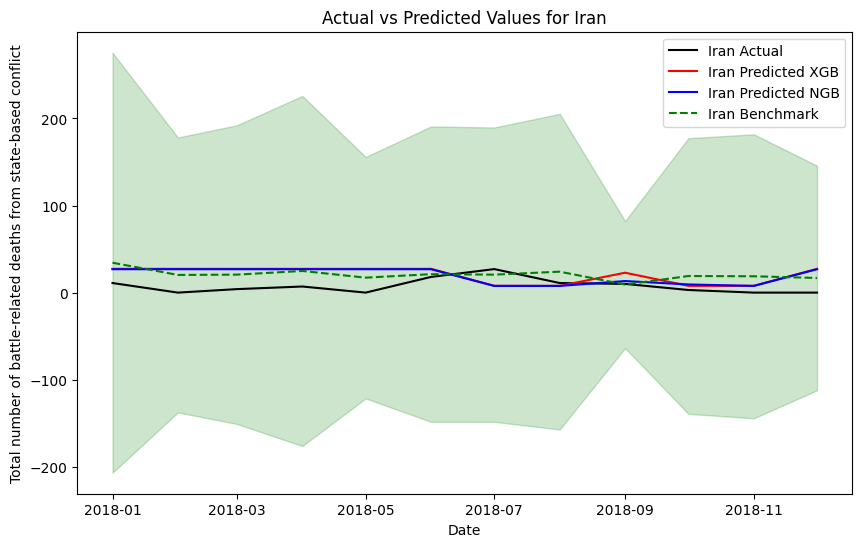

Skipping Kuwait as all actuals are 0
Skipping Qatar as all actuals are 0


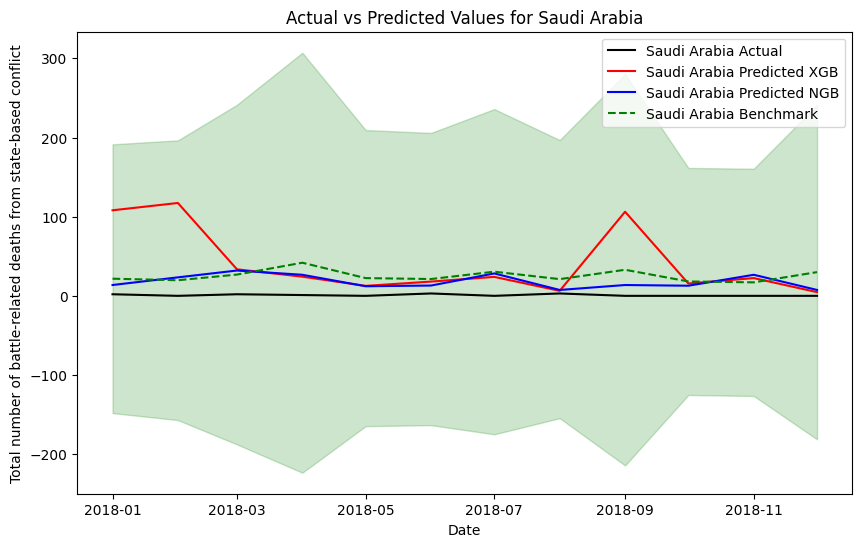

Skipping United Arab Emirates as all actuals are 0


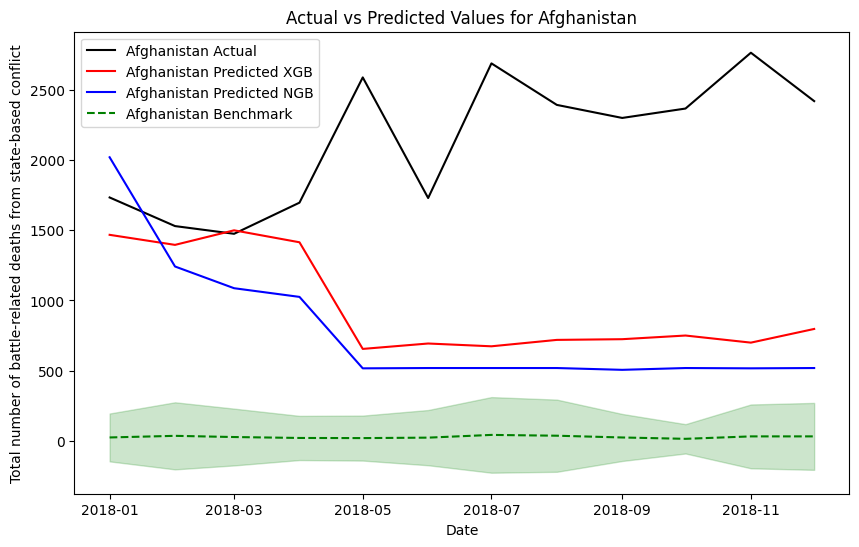

Skipping Kyrgyzstan as all actuals are 0
Skipping Nepal as all actuals are 0


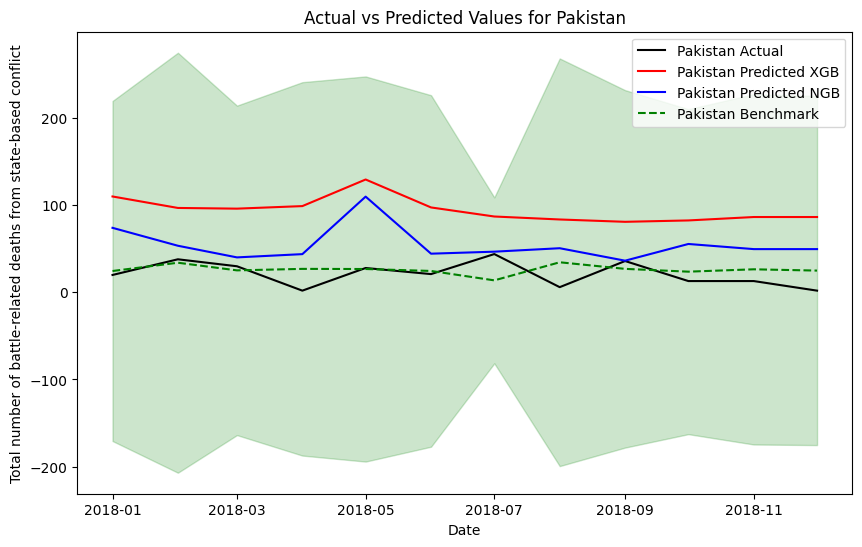

Skipping Tajikistan as all actuals are 0


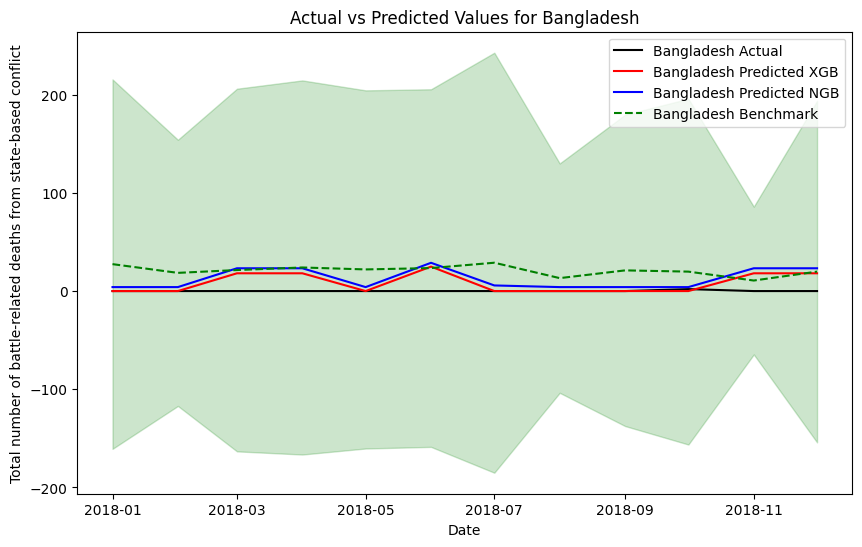

Skipping Bhutan as all actuals are 0
Skipping Japan as all actuals are 0
Skipping North Korea as all actuals are 0


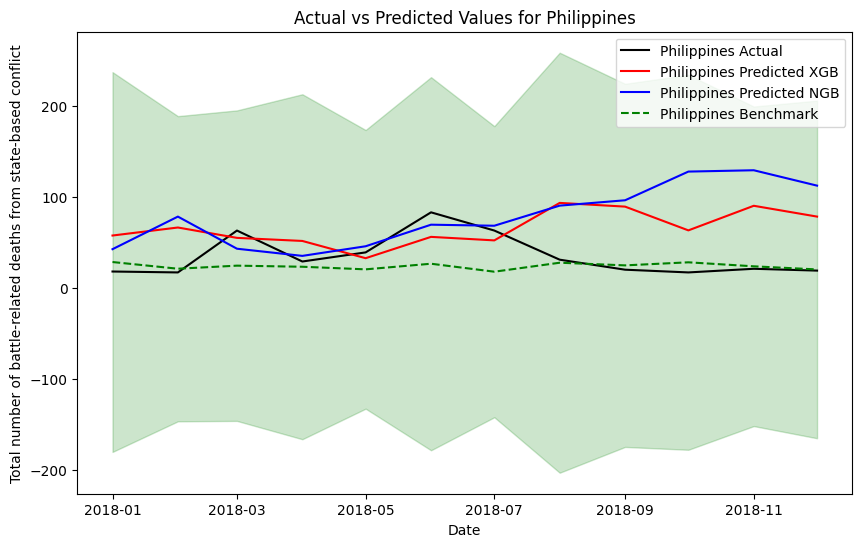

Skipping South Korea as all actuals are 0
Skipping Cambodia as all actuals are 0
Skipping Laos as all actuals are 0


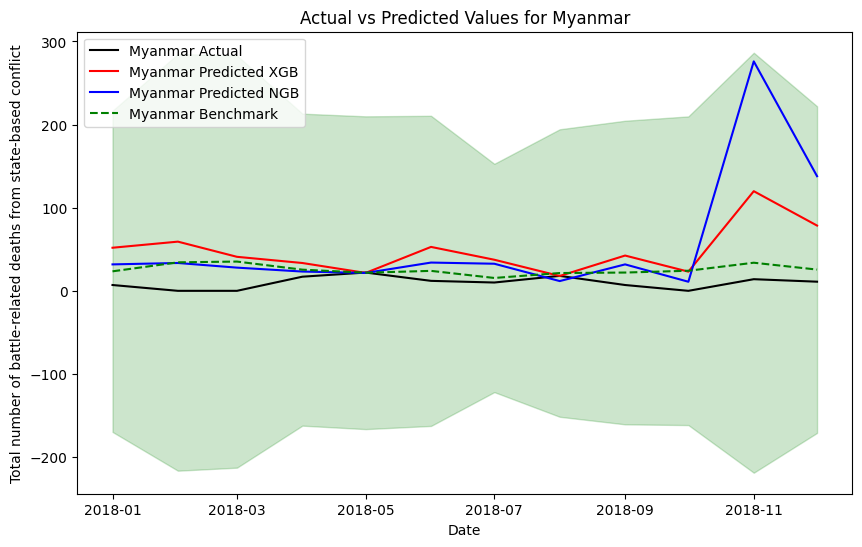

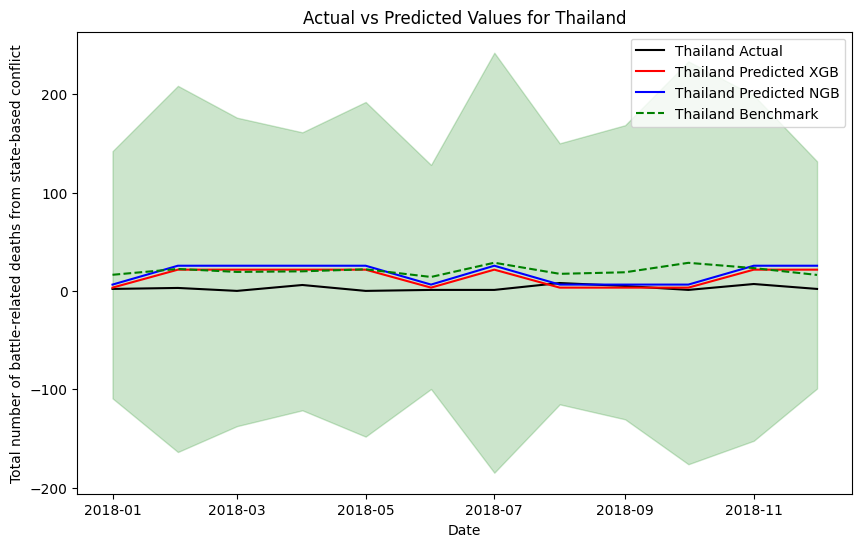

Skipping Vietnam as all actuals are 0
Skipping Botswana as all actuals are 0


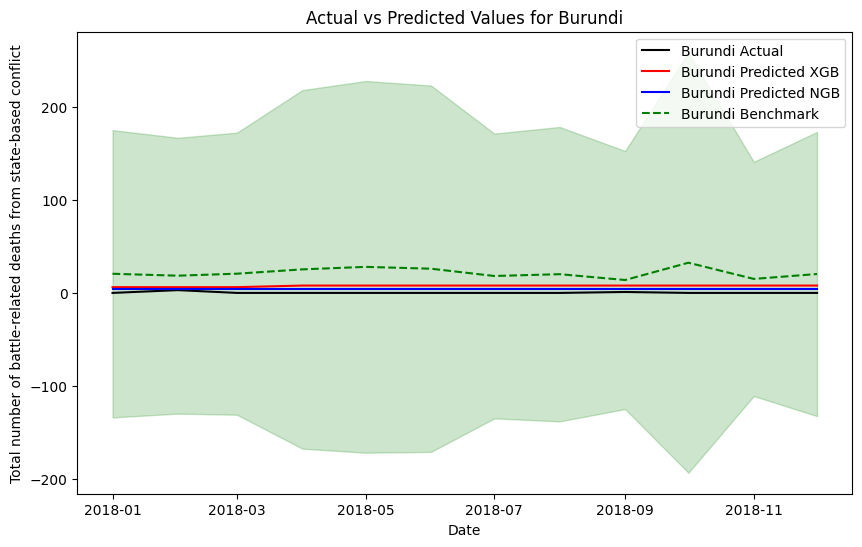

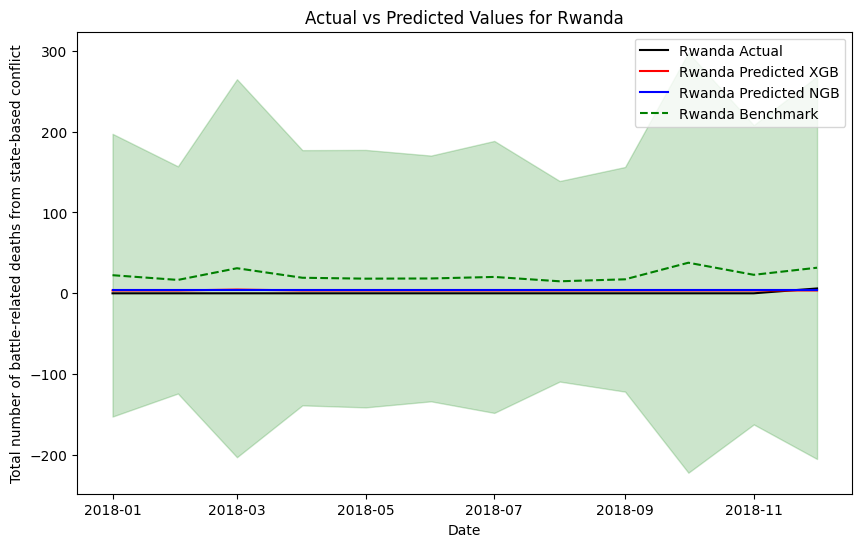

Skipping Zambia as all actuals are 0
Skipping Zimbabwe as all actuals are 0
Skipping Comoros as all actuals are 0
Skipping Lesotho as all actuals are 0
Skipping Malawi as all actuals are 0


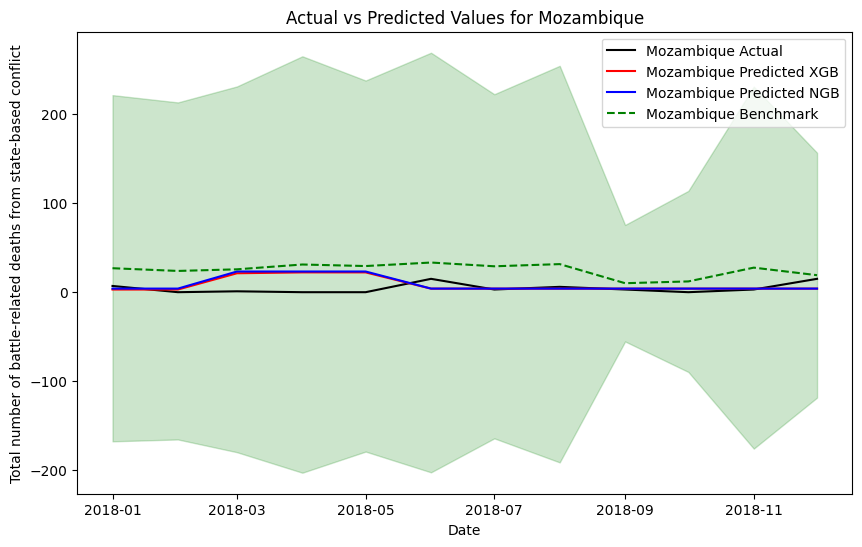

Skipping South Africa as all actuals are 0
Skipping Swaziland as all actuals are 0


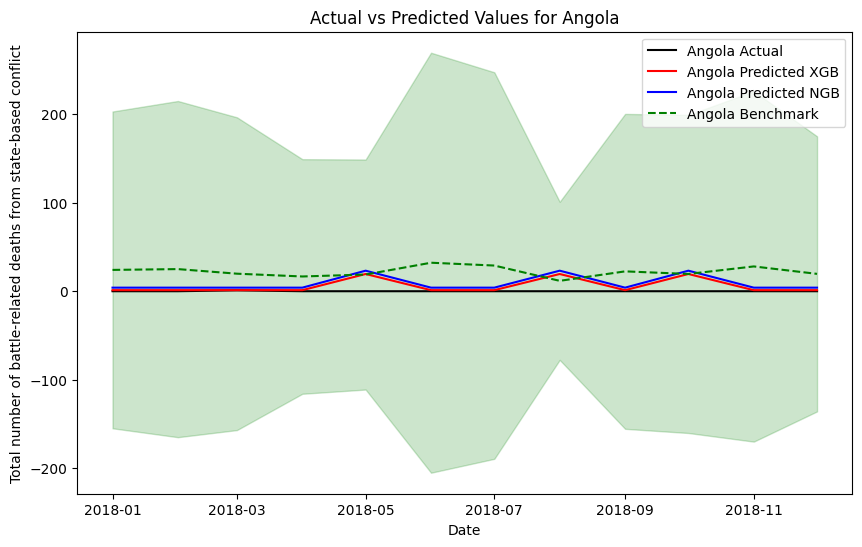

Skipping Congo as all actuals are 0


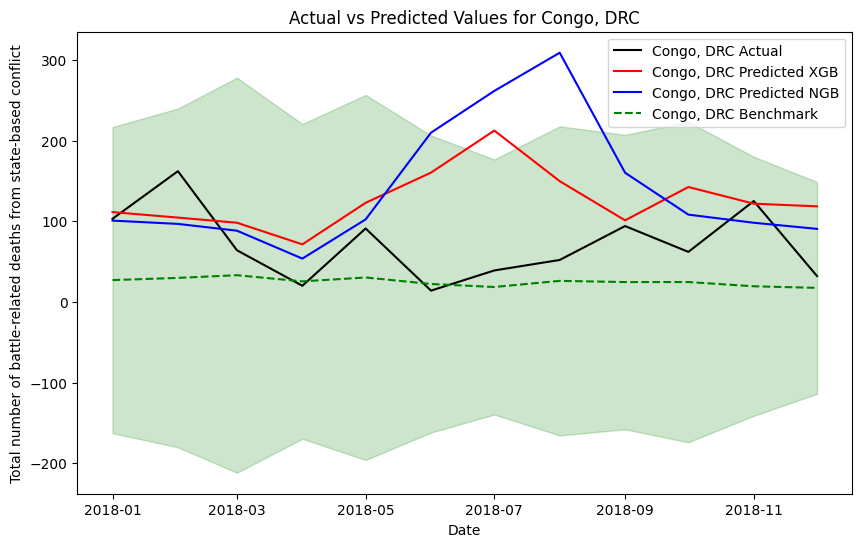

Skipping Fiji as all actuals are 0
Skipping Gabon as all actuals are 0
Skipping Namibia as all actuals are 0
Skipping New Zealand as all actuals are 0
Skipping Madagascar as all actuals are 0
Skipping Mauritius as all actuals are 0
Skipping Timor Leste as all actuals are 0


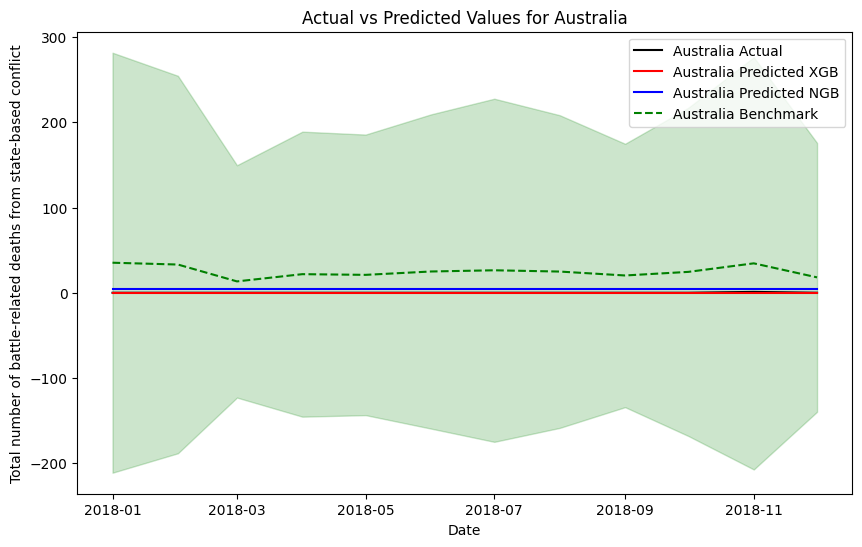

Skipping Papua New Guinea as all actuals are 0
Skipping Solomon Is. as all actuals are 0
Skipping Canada as all actuals are 0
Skipping Germany as all actuals are 0
Skipping China as all actuals are 0
Skipping Malaysia as all actuals are 0
Skipping Singapore as all actuals are 0


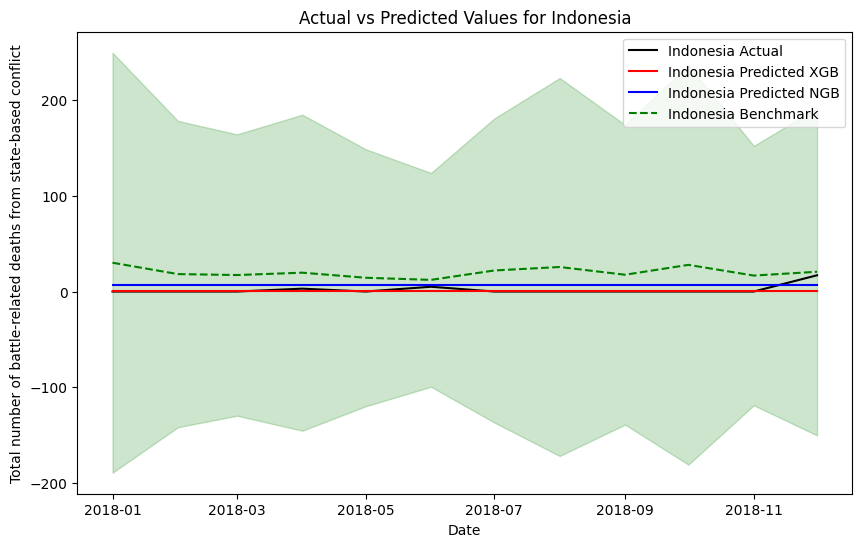

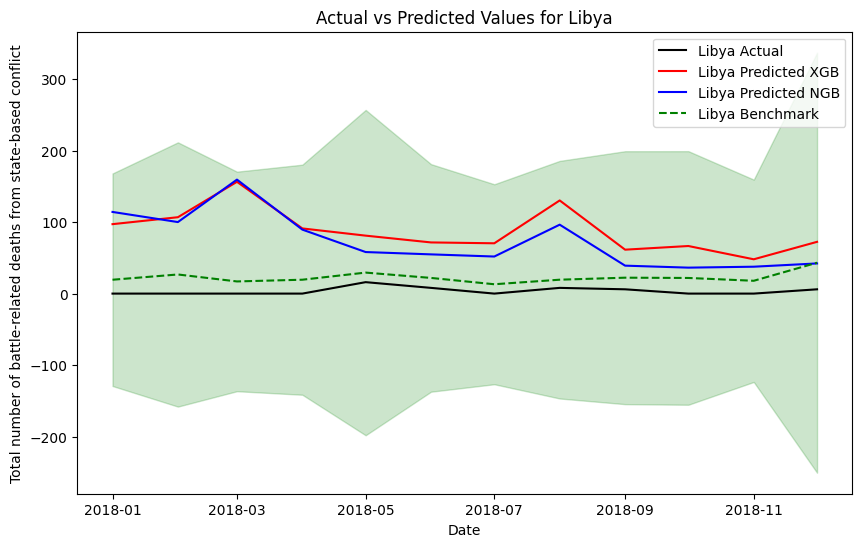

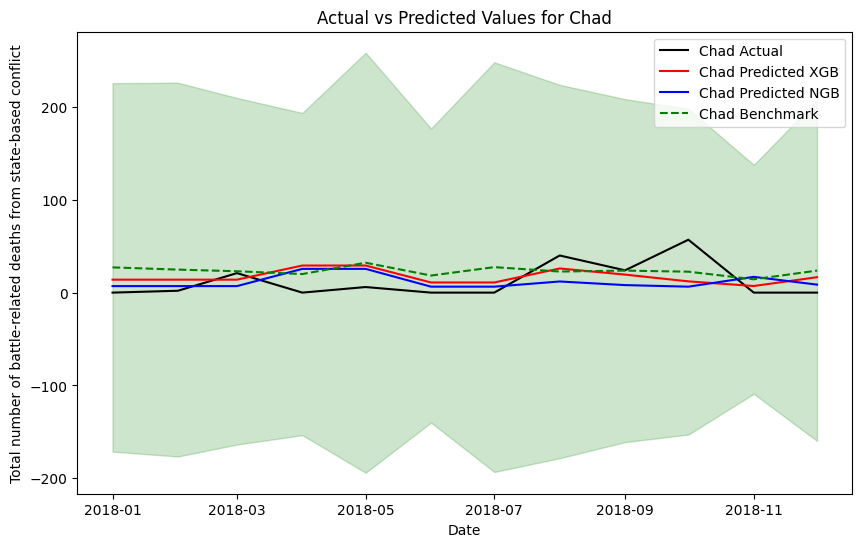

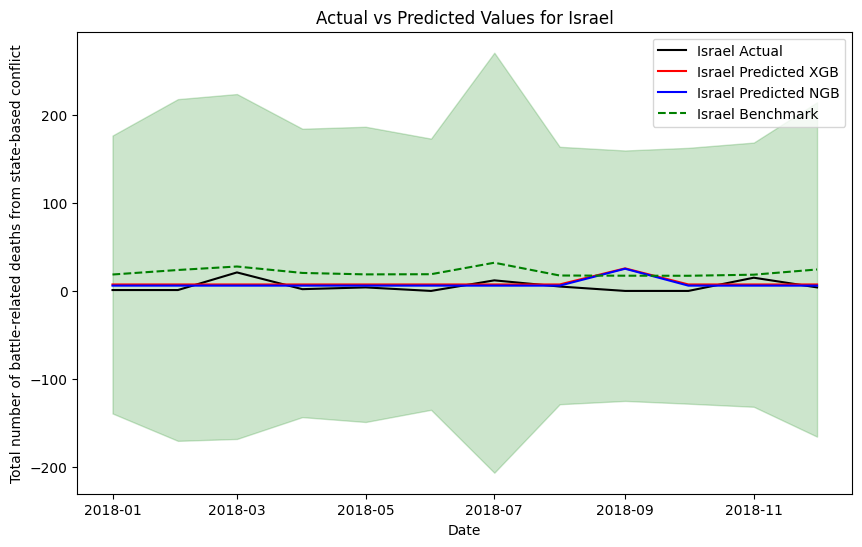

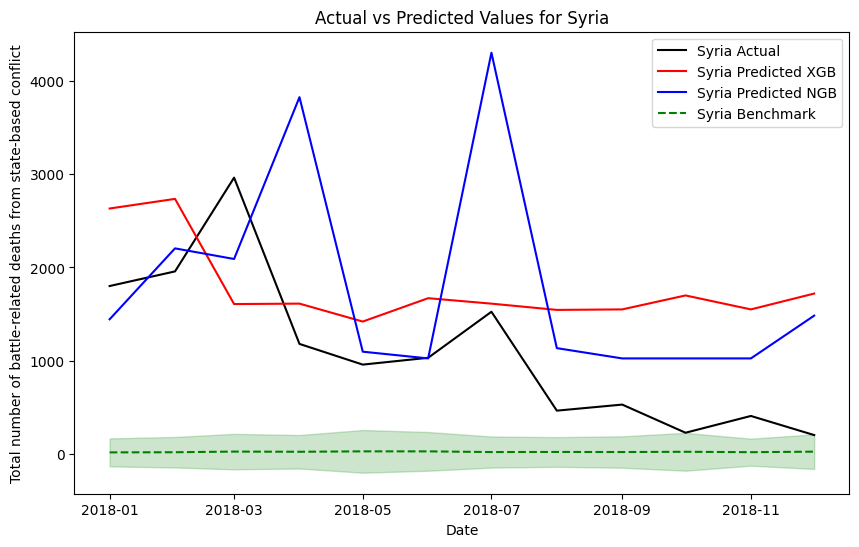

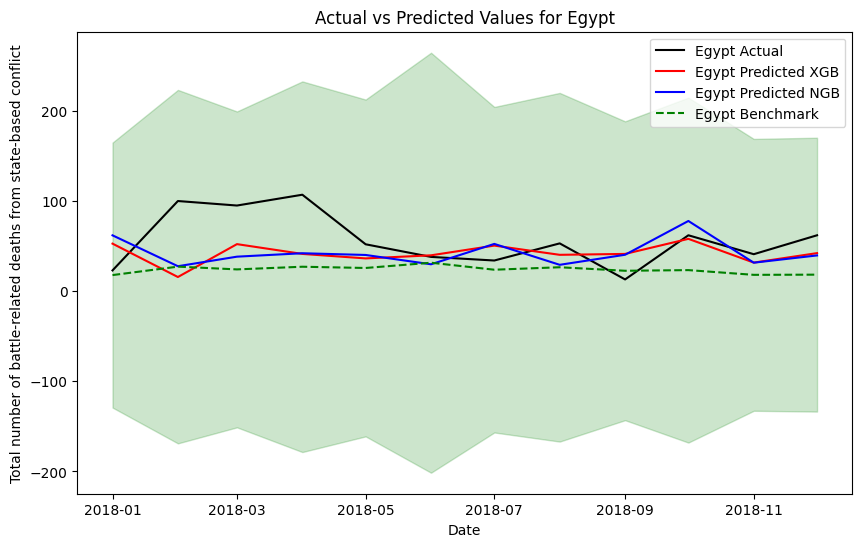

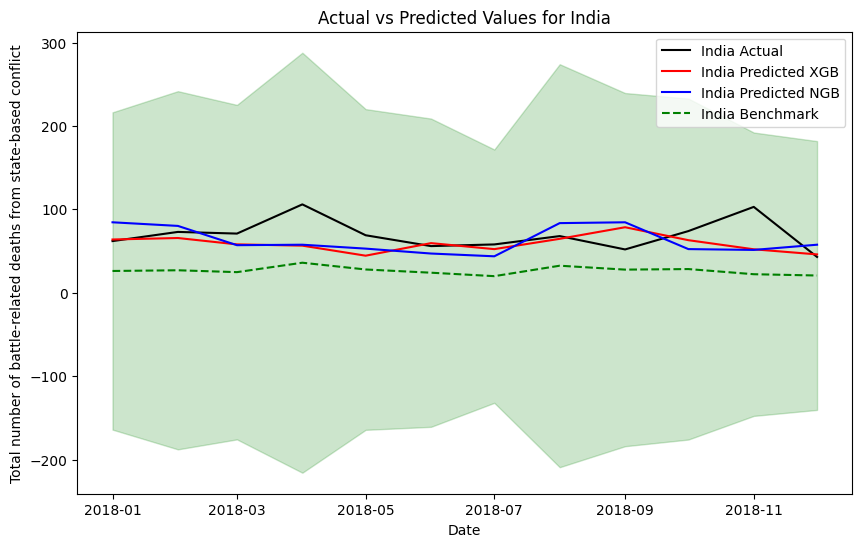

Skipping Montenegro as all actuals are 0
Skipping Serbia as all actuals are 0
Skipping United States as all actuals are 0
Skipping Uganda as all actuals are 0


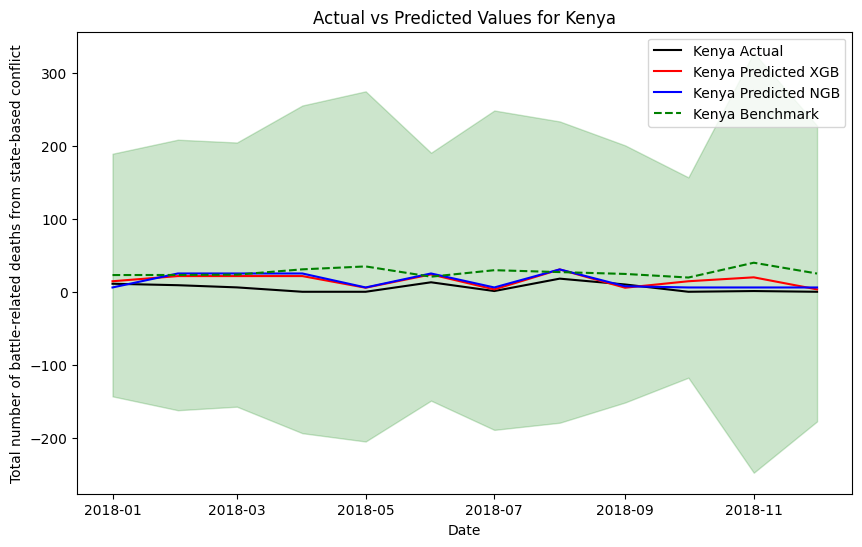

Skipping Tanzania as all actuals are 0
Skipping Morocco as all actuals are 0
Skipping Mauritania as all actuals are 0


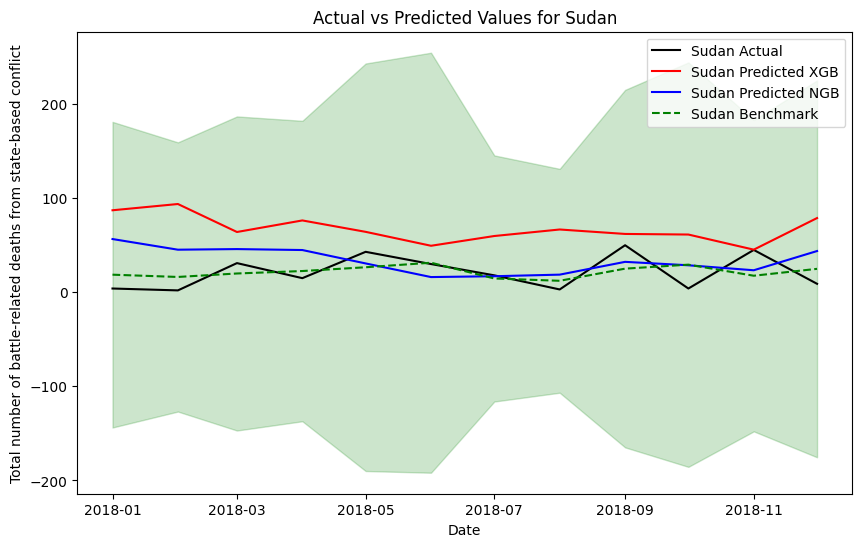

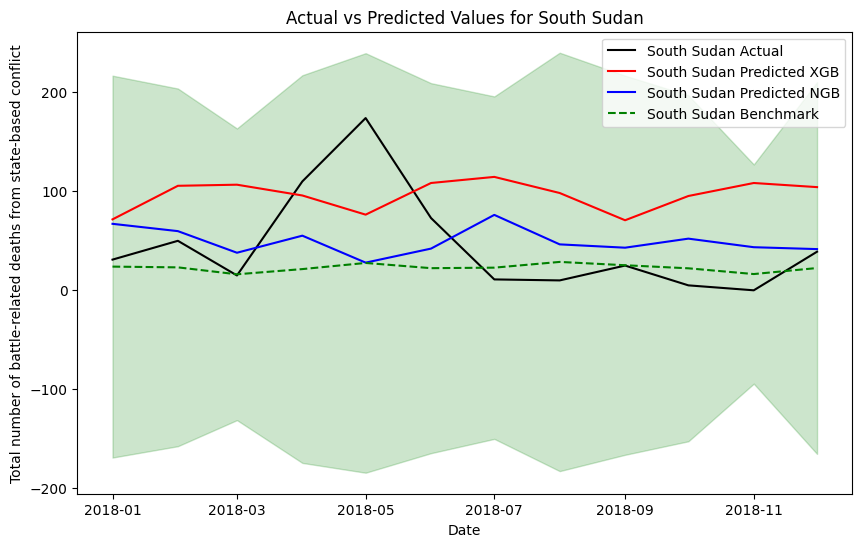

In [854]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

country_list = pd.read_csv('data/country_list.csv')

country_ids = test_df['country_id'].unique().tolist()
# drop country if all actuals are 0
# [country_ids.remove(country_id) for country_id in country_ids if test_df[test_df['country_id'] == country_id][target].sum() == 0]

for country_id in country_ids:
    # Data for this country
    this_country_test = test_df[test_df['country_id'] == country_id]
    # this_country_train = train_df[train_df['country_id'] == country_id]
    country_name = country_list[country_list['country_id'] == country_id]['name'].values[0]

    # skip country if all actuals are 0
    if this_country_test[target].sum() == 0:
        print(f"Skipping {country_name} as all actuals are 0")
        continue

    # Creating plot
    plt.figure(figsize=(10, 6))

    # Plot training data
    # plt.plot(this_country_train['date'], this_country_train[target], label=f'{country_name} Train', color='gray',
    #          linestyle='-', marker='')

    # Plot test actual data
    plt.plot(this_country_test['date'], this_country_test[target], label=f'{country_name} Actual', color='black',
             linestyle='-', marker='')

    # Plot XGB predicted data
    plt.plot(this_country_test['date'], this_country_test['predictions'], label=f'{country_name} Predicted XGB',
             color='red', linestyle='-', marker='')

    # Plot NGB predicted data
    plt.plot(this_country_test['date'], this_country_test['ngb_predictions'], label=f'{country_name} Predicted NGB',
             color='blue', linestyle='-', marker='')

    # plot benchmark
    benchmark_country = benchmark_model[benchmark_model['country_id'] == country_id]
    plt.plot(benchmark_country['date'], benchmark_country['outcome'], label=f'{country_name} Benchmark', color='green',
             linestyle='--', marker='')
    # plot std around benchmark
    plt.fill_between(benchmark_country['date'], benchmark_country['outcome'] - benchmark_country['outcome_std'],
                     benchmark_country['outcome'] + benchmark_country['outcome_std'], color='green', alpha=0.2)

    # # plot actuals
    # actuals_country = actuals_model[actuals_model['country_id'] == country_id]
    # plt.plot(actuals_country['date'], actuals_country['ged_sb'], label=f'{country_name} Actuals', color='purple',
    #          linestyle='--', marker='')

    # Adding title and labels
    plt.title(f"Actual vs Predicted Values for {country_name}")
    plt.xlabel("Date")
    plt.ylabel("Total number of battle-related deaths from state-based conflict")
    plt.legend()

    # Show plot
    plt.show()

In [855]:
import plotly.graph_objects as go

PLOT_ONE_FIGURE = False
if PLOT_ONE_FIGURE:
    # Assuming country_list, test_df, and train_df are already loaded
    # Creating one figure for all countries
    fig = go.Figure()

    country_ids = test_df['country_id'].unique().tolist()

    for country_id in country_ids:
        # Data for this country
        this_country_test = test_df[test_df['country_id'] == country_id]
        this_country_train = train_df[train_df['country_id'] == country_id]
        country_name = country_list[country_list['country_id'] == country_id]['name'].values[0]

        # Add traces for Train Actual
        fig.add_trace(
            go.Scatter(x=this_country_train['date'], y=this_country_train[target], name=f'{country_name} Train',
                       mode='lines', line=dict(color='gray', width=1))
        )

        # Add traces for Test Actual
        fig.add_trace(
            go.Scatter(x=this_country_test['date'], y=this_country_test[target], name=f'{country_name} Test Actual',
                       mode='lines', line=dict(color='blue', width=1))
        )

        # Add traces for Predicted
        fig.add_trace(
            go.Scatter(x=this_country_test['date'], y=this_country_test['predictions'],
                       name=f'{country_name} Predicted', mode='lines', line=dict(color='red', dash='dot', width=1))
        )

    # Add figure title and adjust layout
    fig.update_layout(
        title_text="Actual vs Predicted Values Across Countries",
        xaxis_title="Date",
        yaxis_title="GED_SB Value",
        legend_title="Legend",
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
    )

    # Show plot
    fig.show()

In [856]:
import numpy as np
import os

# TODO: for countries that are in actuals but not in the predictions, add them to the predictions with 0
#  test_df['country_id'].unique()
#  actuals_model['country_id'].unique()
missing_countries = set(benchmark_model['country_id'].unique()) - set(test_df['country_id'].unique())

# save predictions to a csv file
# for each month for each country create 20 draws of the prediction named outcome
# the structure of the file should be month_id, country_id, draw, outcome
new_predictions_list = []
all_countries = set(test_df['country_id'].unique()).union(missing_countries)
for month_id in test_df['month_id'].unique():
    for country_id in all_countries:
        this_country_month = test_df[(test_df['month_id'] == month_id) & (test_df['country_id'] == country_id)]

        if country_id in missing_countries:
            outcomes = np.zeros(100)
        else:
            # Vary outcome by adding random ±20% noise
            outcomes = this_country_month['predictions'].values[0] * np.random.uniform(0.8, 1.2, 100)

        new_predictions_list.extend([{
            'month_id': month_id + 15,  # adjust for prediction window
            'country_id': country_id,
            'draw': draw,
            'outcome': outcome
        } for draw, outcome in enumerate(outcomes, start=1)])

# set month_id, country_id, draw as int and outcome as float

new_predictions = pd.DataFrame(new_predictions_list)
new_predictions['month_id'] = new_predictions['month_id'].astype(int)
new_predictions['country_id'] = new_predictions['country_id'].astype(int)
new_predictions['draw'] = new_predictions['draw'].astype(int)
new_predictions['outcome'] = new_predictions['outcome'].astype(int)
# set index to month_id, country_id, draw
new_predictions.set_index(['month_id', 'country_id', 'draw'], inplace=True)
# create folder if it does not exist recursively
folder = "submission/xg_boost/cm/window=Y2018"
os.makedirs(folder, exist_ok=True)
new_predictions.to_parquet(folder + f'/xg_boost_{prediction_year}.parquet')

new_predictions

outcome
month_id country_id draw         
457      1          1           0
                    2           0
                    3           0
                    4           0
                    5           0
...                           ...
468      246        96         90
                    97        120
                    98         95
                    99        124
                    100       111

[229200 rows x 1 columns]

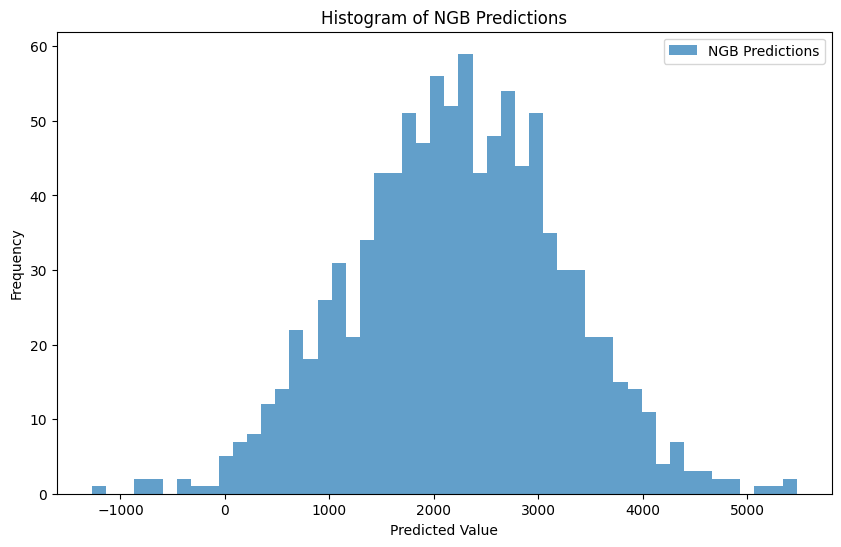

In [857]:
ngb_predictions_sampled = ngb_predictions_dist.sample(1000).T.astype(int)
# 
# concat to test_df
# test_df = pd.concat([test_df, ngb_predictions_sampled], axis=1)


# negative_mask = ngb_predictions_sampled < 0
# # print how many negative values are there
# print(negative_mask.sum().sum()) # 917442
# # print total number of values
# print(negative_mask.size) # 2028000
# # print percentage of negative values
# print(negative_mask.sum().sum() / negative_mask.size) #0.452387573964497
# # sample once more and fill in the previous negative values with values from new distribution
# ngb_predictions_sampled[negative_mask] = ngb_predictions_dist.sample(1000).T[negative_mask]
# # print again how many negative values are there
# negative_mask =  ngb_predictions_sampled < 0
# print(negative_mask.sum().sum())  # 423012

# # set 0 if negative
# # ngb_predictions_sampled = ngb_predictions_sampled.clip(min=0)
# ngb_predictions_sampled = ngb_predictions_sampled
# 
# 
# # plot histogram of the sampled predictions using plt
plt.figure(figsize=(10, 6))
plt.hist(ngb_predictions_sampled[325], bins=50, alpha=0.7, label='NGB Predictions')  # MAX
# plot a dot for the actual value
# plt.scatter([actuals_model['ged_sb'].max()], [0], color='red', label='Actual Value')
# plt.hist(ngb_predictions_sampled[20], bins=50, alpha=0.7, label='NGB Predictions') # MIN
plt.title('Histogram of NGB Predictions')
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# ngb_predictions_sampled[0]

In [858]:

# len(set(benchmark_model['country_id'].unique()) - set(test_df['country_id'].unique()))
print(benchmark_model['month_id'].unique())
print(test_df['month_id'].unique())
print("Adjusted month_id for predictions:", test_df['month_id'].unique() + 15)
set(benchmark_model['month_id'].unique()) == set(test_df['month_id'].unique() + 15)

[457 458 459 460 461 462 463 464 465 466 467 468]
[442 443 444 445 446 447 448 449 450 451 452 453]
Adjusted month_id for predictions: [457 458 459 460 461 462 463 464 465 466 467 468]


True

In [859]:
# temp = test_df
# temp.reset_index(inplace=False, drop=False)
# 
# # get row with the highest number of deaths
# temp[temp['predictions'] == temp['predictions'].max()]
# print(temp[temp['predictions'] == temp['predictions'].min()])

# NOTE !!!!
test_df.reset_index(inplace=True, drop=True)
test_df_edge = test_df.shape[1]
test_df_new = pd.concat([test_df, pd.DataFrame(ngb_predictions_sampled)], axis=1)
ngb_predictions_sampled[12] == test_df_new.iloc[12, test_df_edge:]

# get the row with the highest number of deaths
# actuals_model


# add to test_df_new the actuals based on month_id and country_id
# actuals_model.rename(columns={'ged_sb': 'actuals'}, inplace=True)
# test_df_new.merge(actuals_model[['month_id', 'country_id', 'actuals']], on=['month_id', 'country_id'])

# drop level 0 and index columns
# test_df.drop(columns=['level_0', 'index'], inplace=True, errors='ignore')
# test_df_new

0      True
1      True
2      True
3      True
4      True
       ... 
995    True
996    True
997    True
998    True
999    True
Name: 12, Length: 1000, dtype: bool

In [860]:
# actuals_model.rename(columns={'ged_sb': 'actuals'}, inplace=True)
# actuals_model.set_index(['month_id', 'country_id'], inplace=True)
# test_df_new.set_index(['month_id', 'country_id'], inplace=True)

In [861]:
# actuals_model.rename(columns={'ged_sb': 'actuals'}, inplace=True)
# test_df_new.reset_index(inplace=True, drop=True)
# actuals_model.reset_index(inplace=True, drop=True)


# drop actuals if it exists
# test_df_new = test_df_new.drop(columns='actuals', errors='ignore')

# join actuals to test_df_new
# test_df_new = test_df_new.join(actuals_model['actuals'], how='left')
# test_df_new.reset_index(inplace=True)
# actuals_model.reset_index(inplace=True)
# test_df_new
# actuals_model['actuals']
# test_df_new.head(10)
# test_df_new.head(1000)

In [862]:
print(list(test_df_new.columns).index(target))
print(len(test_df_new.columns))
print(test_df_edge)
test_df_new.head(10)[['month_id', 'country_id', target, 'predictions', 'ngb_predictions']]

126
1131
131


month_id country_id  y_shifted  predictions  ngb_predictions
0       442          1        0.0     0.224733         4.044130
1       442          2        0.0     0.224733         4.044130
2       442          3        0.0     0.224733         4.044130
3       442          4        0.0     0.561162         6.410505
4       442          7        0.0     0.224733         4.044130
5       442          8        0.0     0.224733         4.044130
6       442          9        0.0     2.764147         8.263263
7       442         10        0.0     0.224733         4.044130
8       442         11        0.0     0.224733         4.044130
9       442         12        0.0     0.224733         4.044130

In [863]:
# test_df_edge = test_df_new.shape[1]
# test_df_new = pd.concat([test_df_new, pd.DataFrame(ngb_predictions_sampled)], axis=1)
# ngb_predictions_sampled[1] == test_df_new.iloc[1, test_df_edge:]

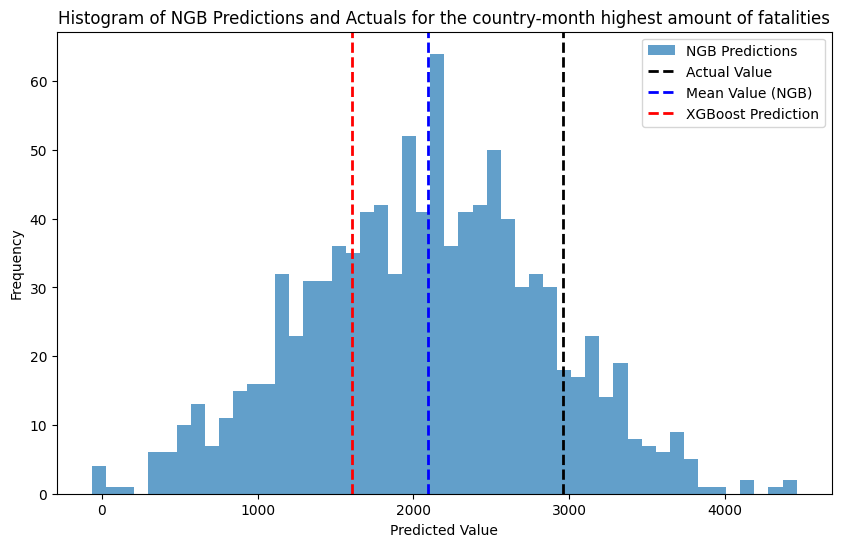

In [864]:
rowww = test_df_new[test_df_new[target] == test_df_new[target].max()]
actual_pred = rowww[target].values[0]
hist_data_temp = rowww.iloc[:, test_df_edge:].values[0]
# keep only samples that are in 95% confidence interval


# Plot histogram of the sampled predictions using plt
plt.figure(figsize=(10, 6))
plt.hist(hist_data_temp, bins=50, alpha=0.7, label='NGB Predictions')

# Plot vertical lines for actual value, mean value, and other relevant predictions
plt.axvline(x=actual_pred, color='black', linestyle='dashed', linewidth=2, label='Actual Value')
plt.axvline(x=rowww['ngb_predictions'].values[0], color='blue', linestyle='dashed', linewidth=2,
            label='Mean Value (NGB)')
plt.axvline(x=rowww['predictions'].values[0], color='red', linestyle='dashed', linewidth=2, label='XGBoost Prediction')

plt.title('Histogram of NGB Predictions and Actuals for the country-month highest amount of fatalities')
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [865]:
test_df_new[test_df_new[target] == test_df_new[target].max()]['ngb_predictions']

494    2091.099589
Name: ngb_predictions, dtype: float64

In [866]:
rowww[['month_id', 'country_id', target, 'predictions', 'ngb_predictions']]

month_id country_id  y_shifted  predictions  ngb_predictions
494       444        220     2964.0  1607.655518      2091.099589